In [1]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

In [2]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
# sc.logging.print_header()

In [3]:
pbmc = sc.datasets.pbmc68k_reduced() # Jeu de données fait avec l'algo Louvain

# inspect pbmc contents
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

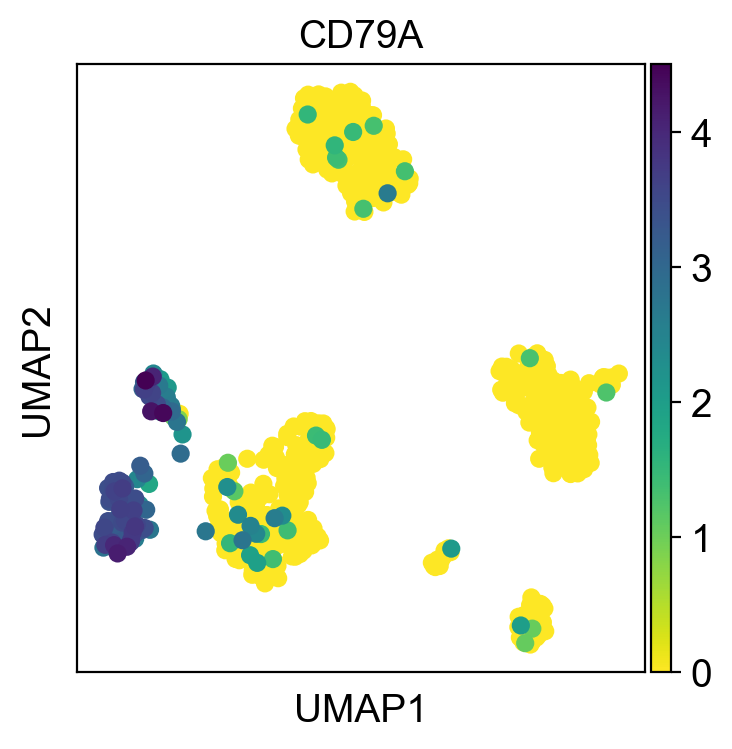

In [4]:
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(pbmc, color='CD79A')

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


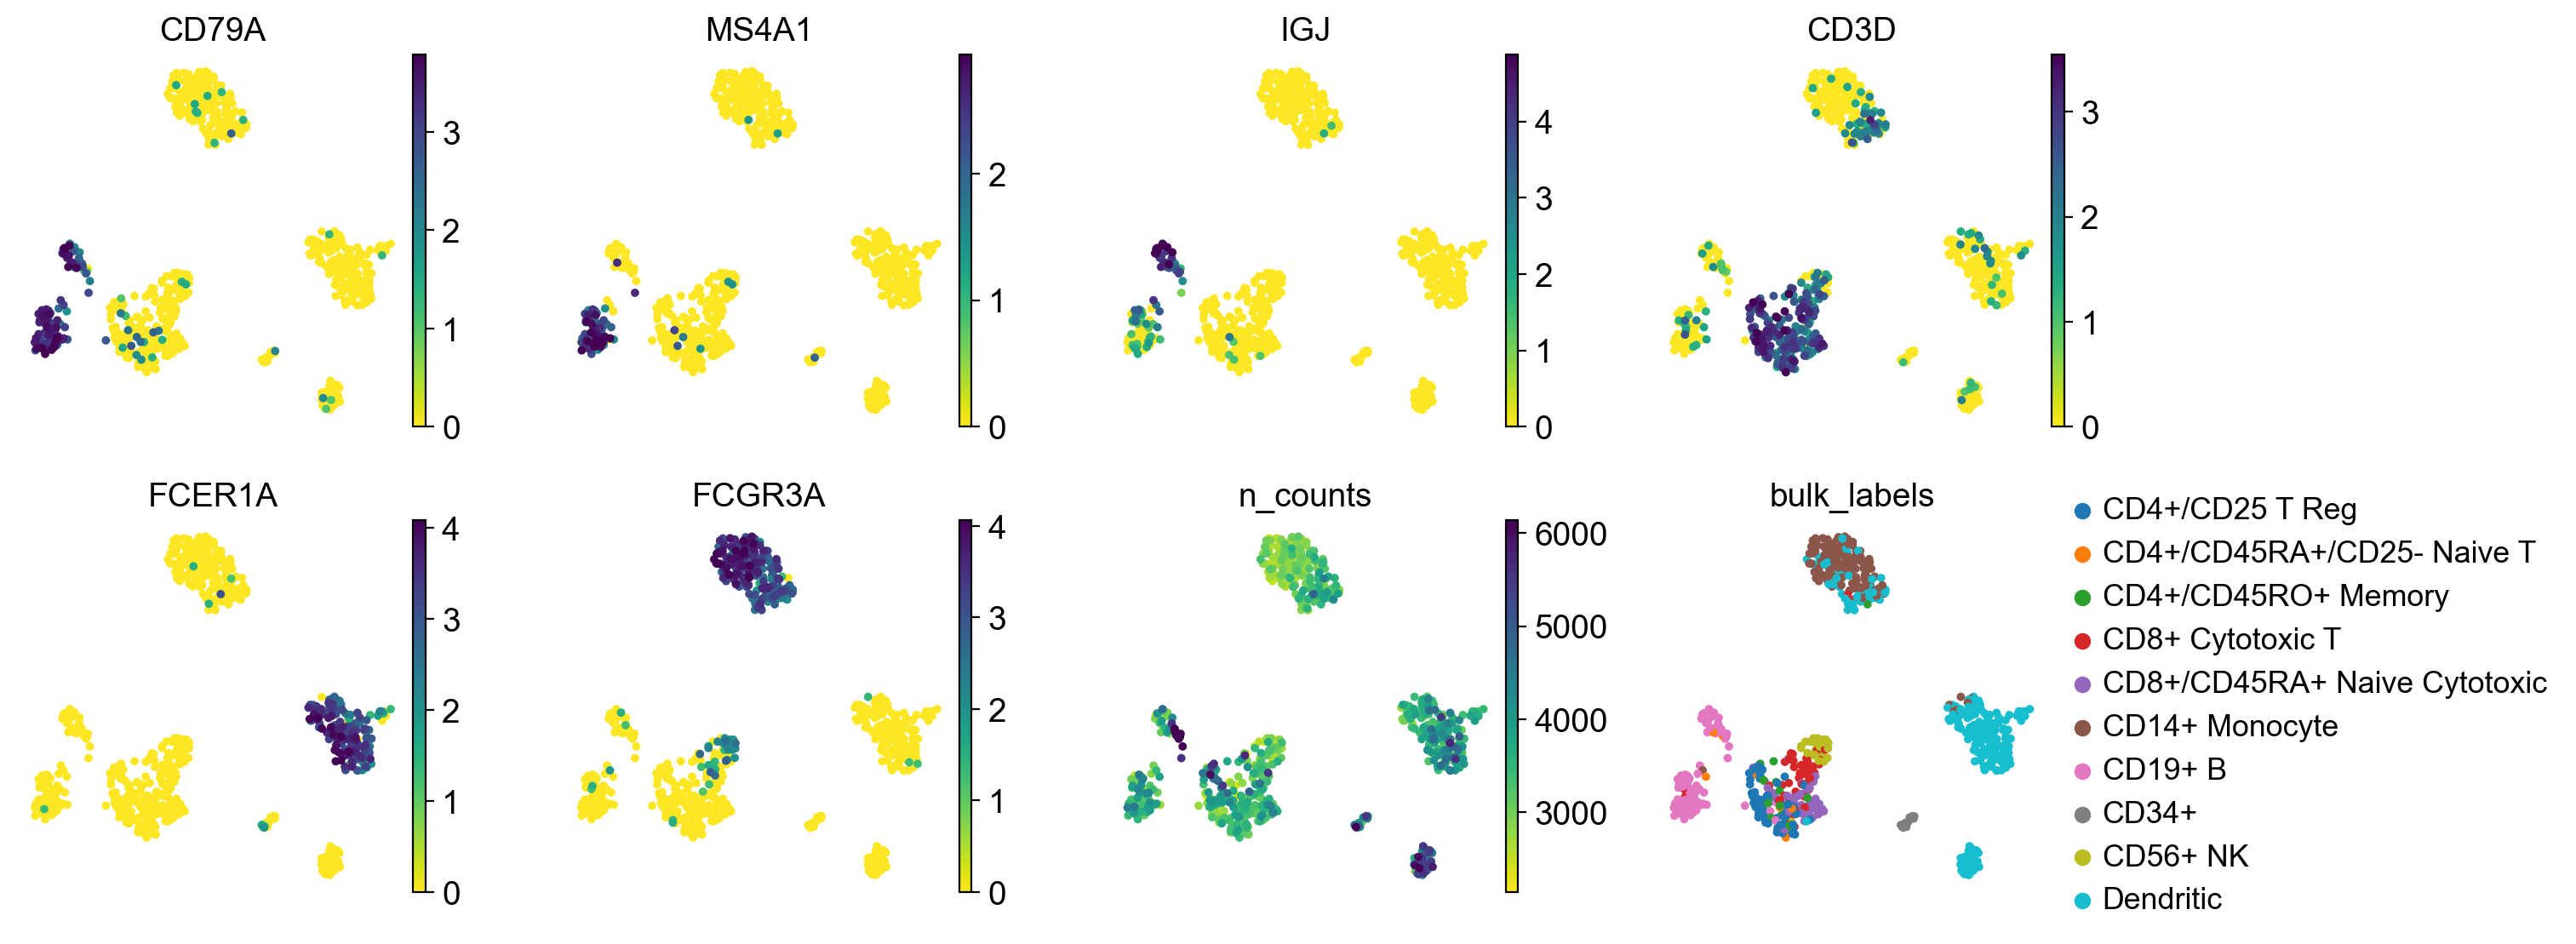

In [5]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(pbmc, color=['CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A', 'n_counts', 'bulk_labels'], s=50, frameon=False, ncols=4, vmax='p99')

In [6]:
# compute clusters using the leiden method and store the results with the name `clusters`
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


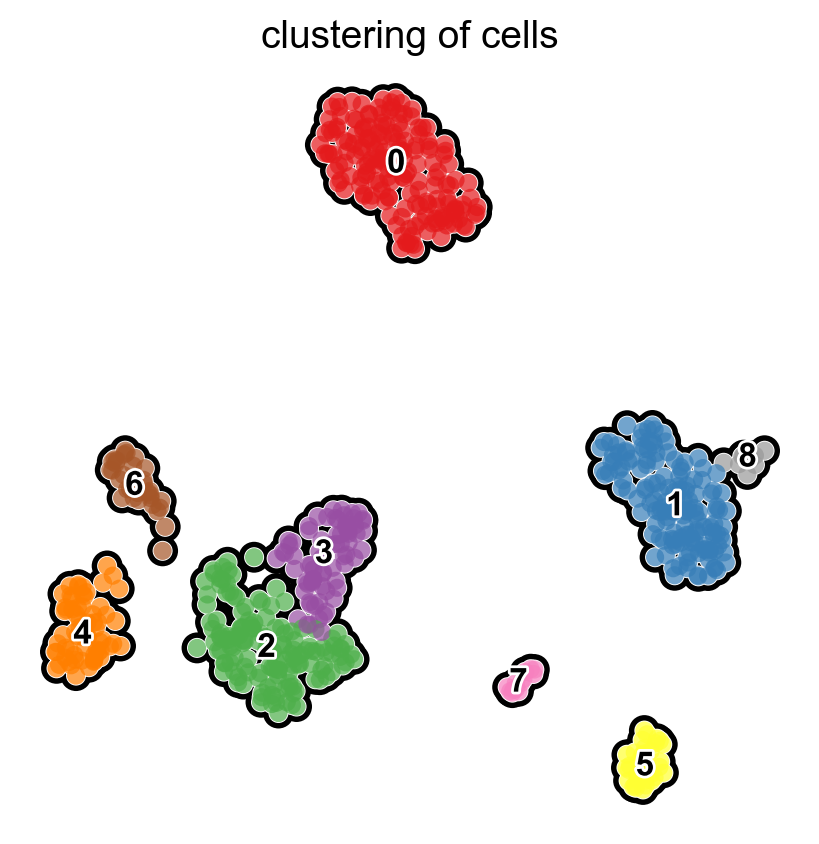

In [7]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

# Identification of clusters based on known marker genes

---

Frequently, clusters need to be labelled using well known marker genes. Using scatter plots we can see the expression of a gene and perhaps associate it with a cluster. Here, we will show other visual ways to associate marker genes to clusters using dotplots, violin plots, heatmaps and something that we call ‘tracksplot’. All of these visualizations summarize the same information, expression split by cluster, and the selection of the best results is left to the investigator do decide.

First, we set up a dictionary with the marker genes, as this will allow scanpy to automatically label the groups of genes:

In [8]:
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

## dotplot

A quick way to check the expression of these genes per cluster is to using a dotplot. This type of plot summarizes two types of information: the color represents the mean expression within each of the categories (in this case in each cluster) and the dot size indicates the fraction of cells in the categories expressing a gene.

Also, it is also useful to add a dendrogram to the graph to bring together similar clusters. The hierarchical clustering is computed automatically using the correlation of the PCA components between the clusters.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


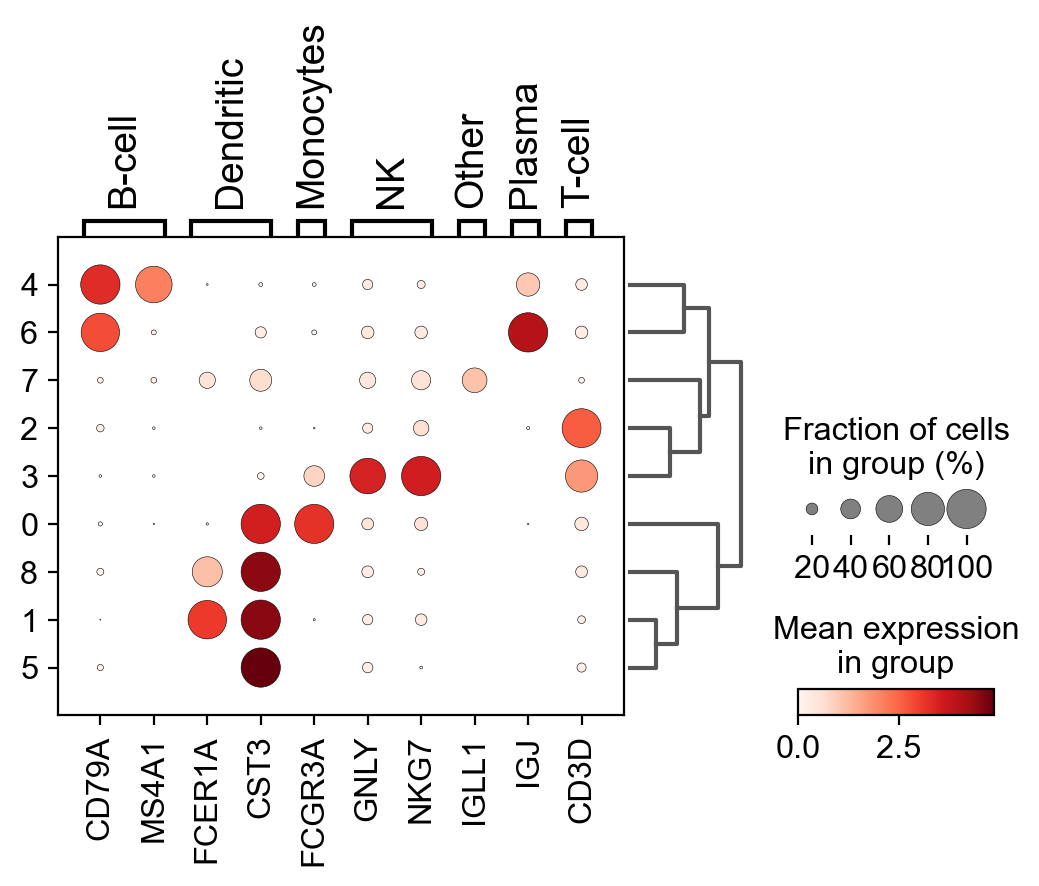

In [9]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

Using this plot, we can see that cluster 4 correspond to B-cells, cluster 2 is T-cells etc. This information can be used to manually annotate the cells as follows:

In [10]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
     '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


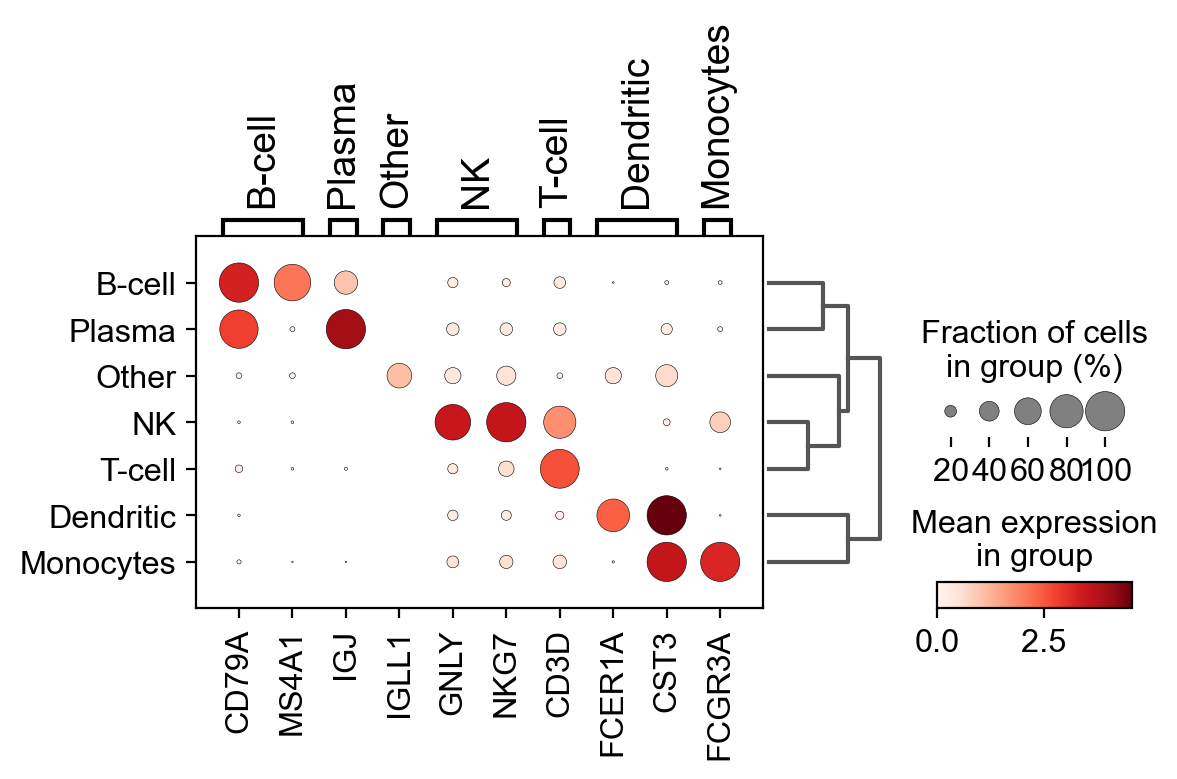

In [11]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'cell type', dendrogram=True)

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


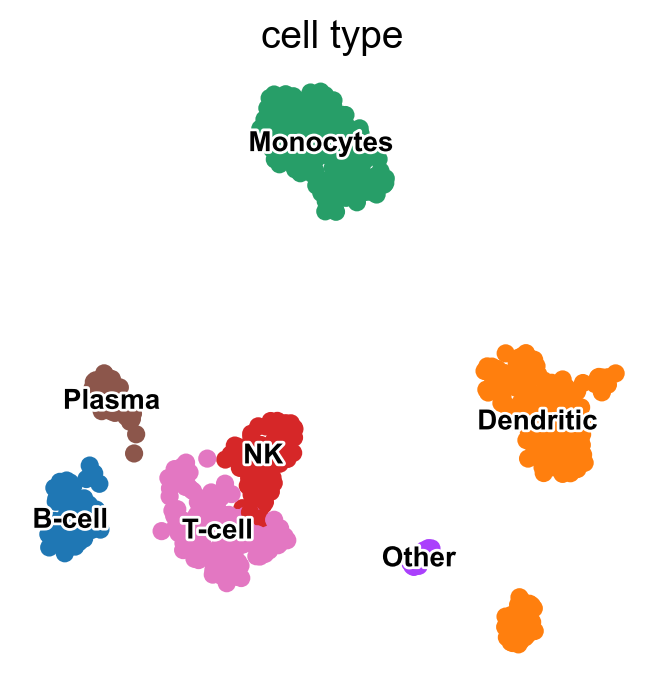

In [12]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

## violin plot

A different way to explore the markers is with violin plots. Here we can see the expression of **CD79A** in clusters **5** and **7**, and **MS4A1** in cluster **5**. Compared to a dotplot, the violin plot gives us and idea of the **distribution of gene expression** values across cells.



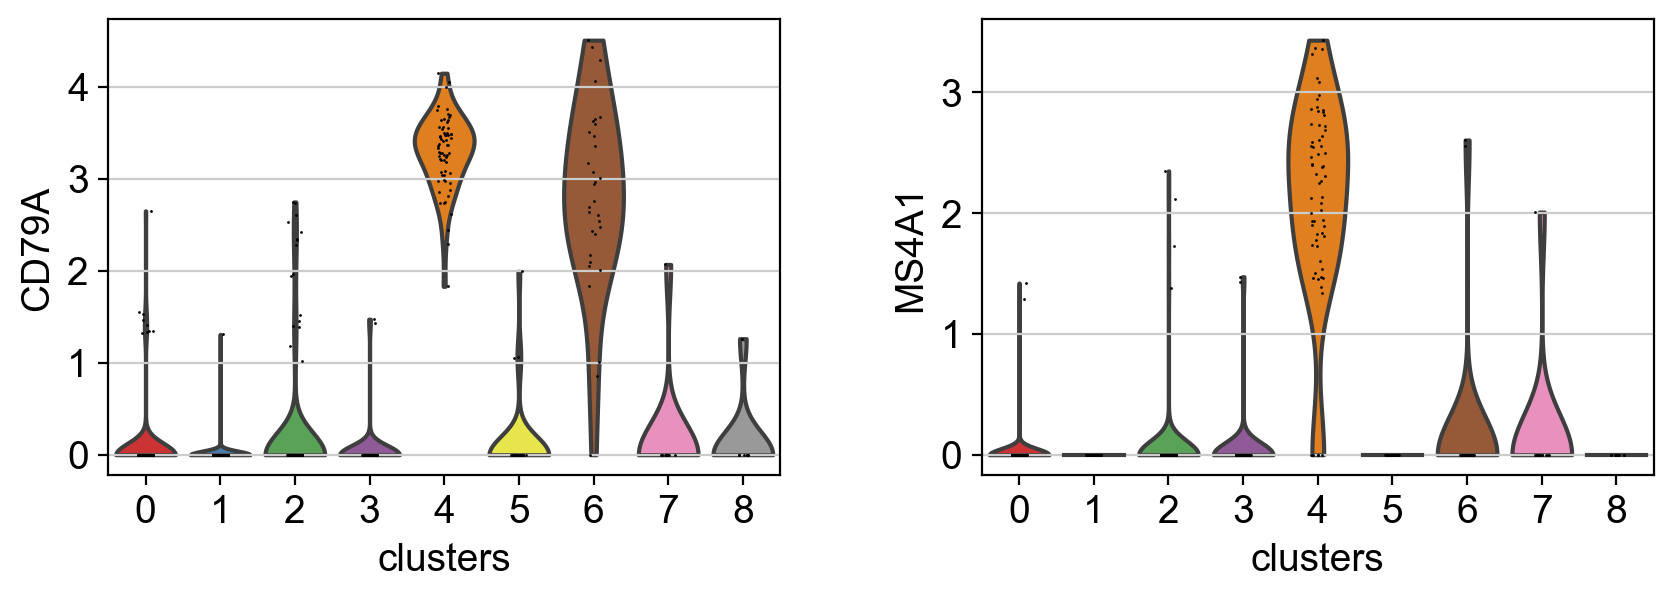

In [13]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['CD79A', 'MS4A1'], groupby='clusters' )

Violin plots can also be used to plot any numerical value stored in .obs. For example, here violin plots are used to compare the number of genes and the percentage of mitochondrial genes between the different clusters.

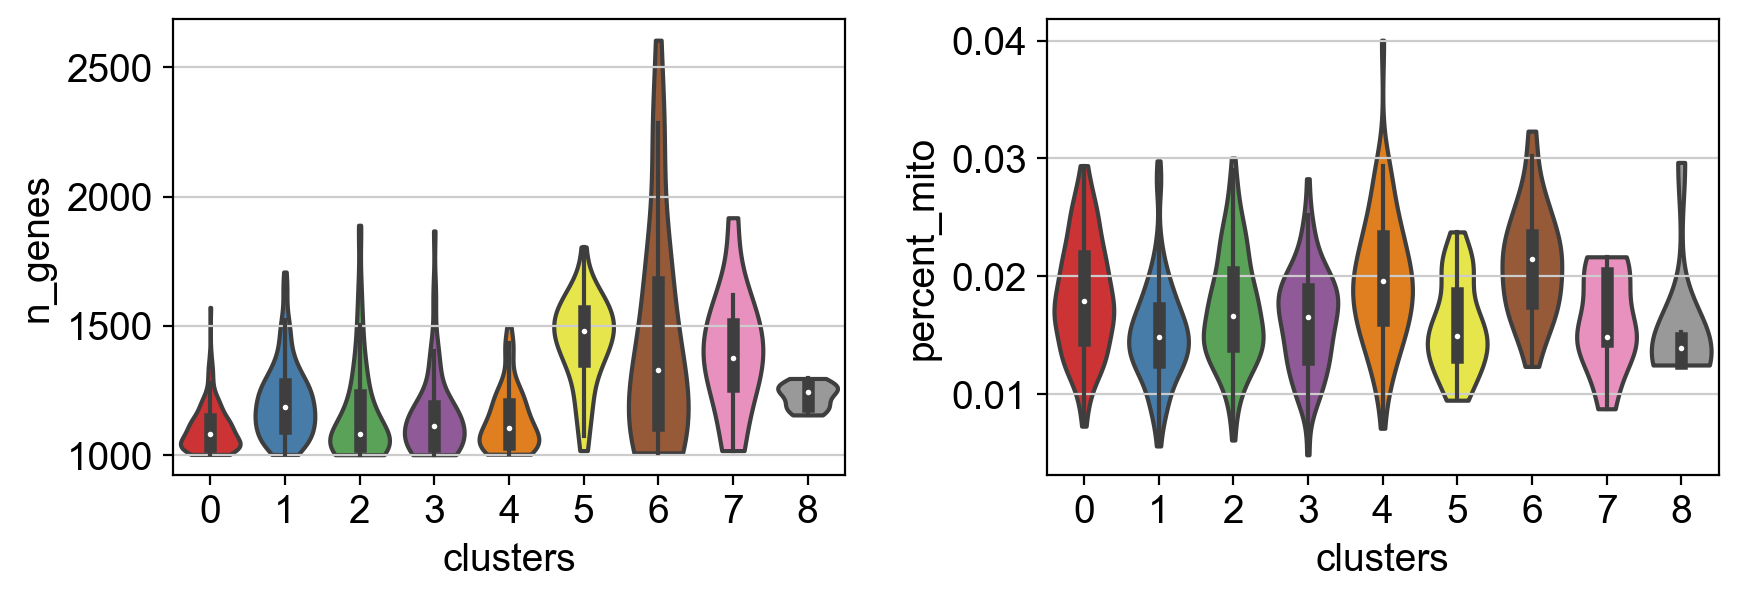

In [14]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')  
# use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

## stacked-violin plot

To simultaneously look at the violin plots for all marker genes we use sc.pl.stacked_violin. As previously, a dendrogram was added to group similar clusters

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


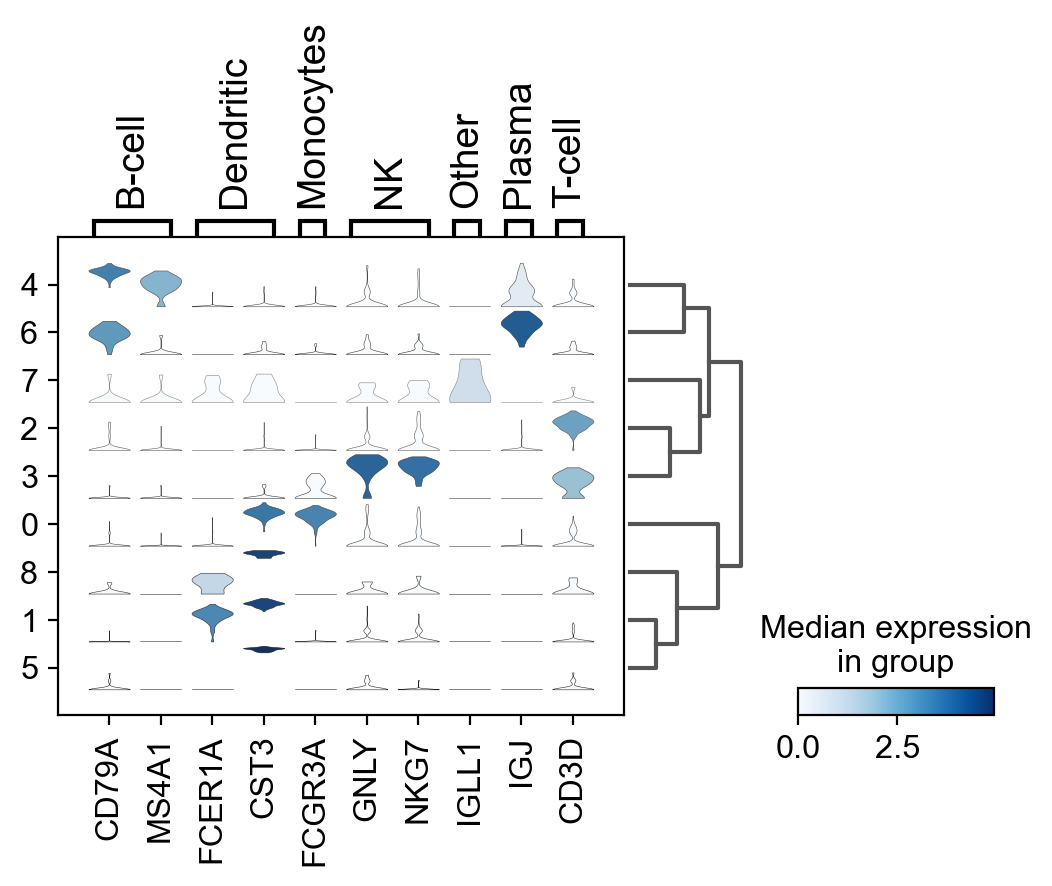

In [15]:
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

## matrixplot

A simple way to visualize the expression of genes is with a matrix plot. This is a heatmap of the mean expression values per gene grouped by categories. This type plot basically shows the same information as the color in the dotplots.

Here, scale the expression of the genes from 0 to 1, being the maximum mean expression and 0 the minimum.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


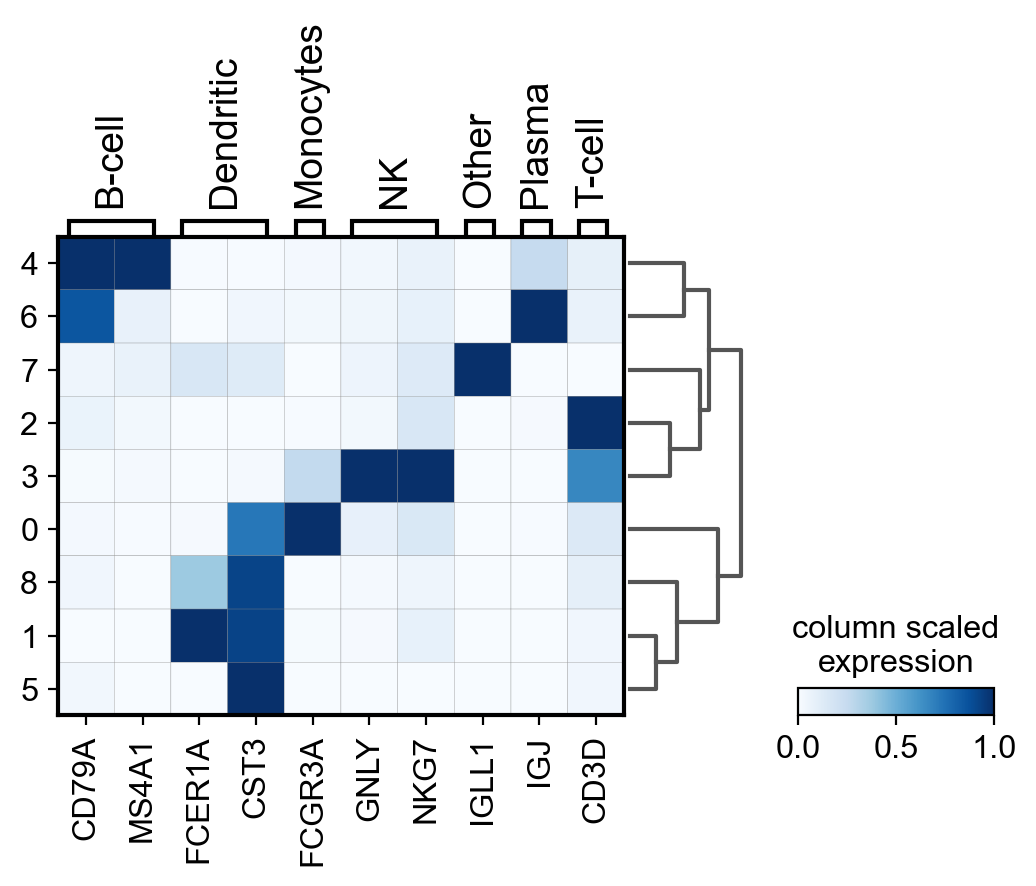

In [16]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

Other useful option is to normalize the gene expression using `sc.pp.scale`. Here we store this information under the `scale` layer. Afterwards we adjust the plot min and max and use a diverging color map (in this case `RdBu_r` where `_r` means reversed).

In [17]:
# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


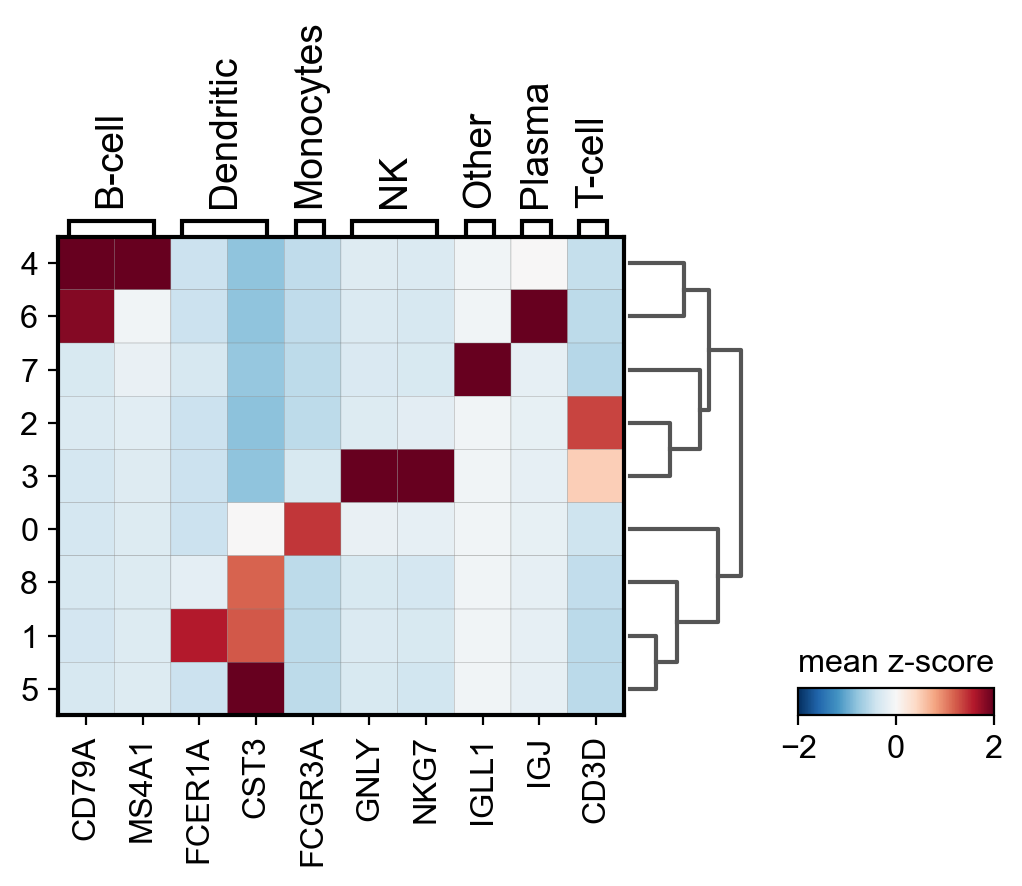

In [18]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Combining plots in subplots

An `axis` can be passed to a plot to combine multiple outputs as in the following example

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


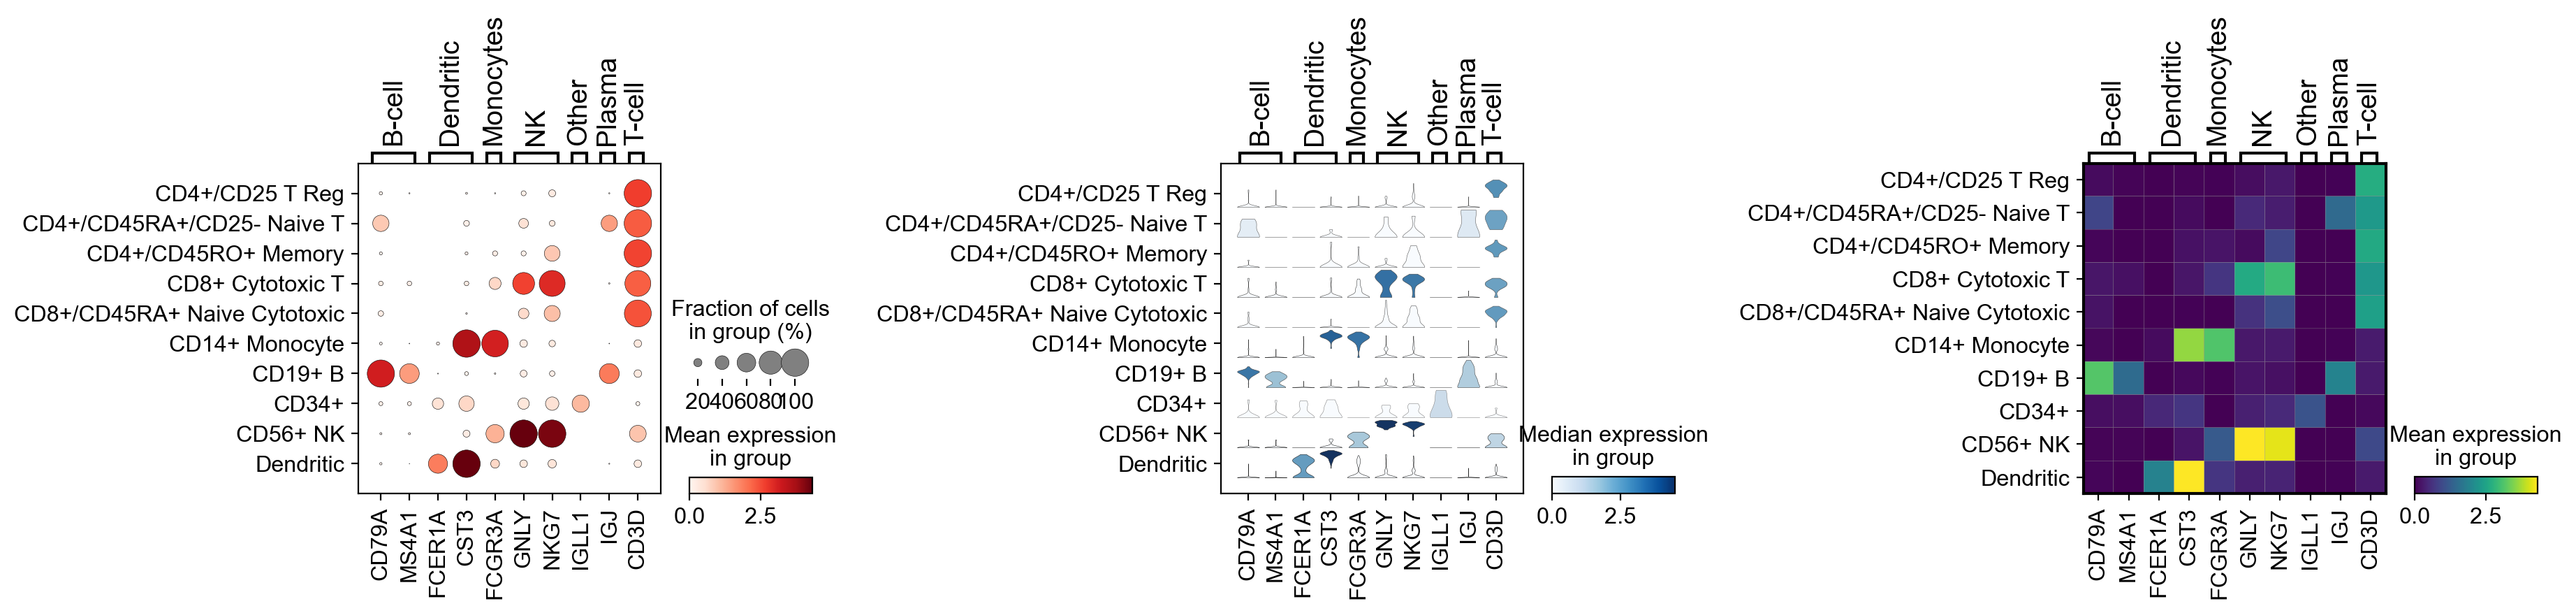

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4), gridspec_kw={'wspace':0.9})

ax1_dict = sc.pl.dotplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax1, show=False)
ax2_dict = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax2, show=False)
ax3_dict = sc.pl.matrixplot(pbmc, marker_genes_dict, groupby='bulk_labels', ax=ax3, show=False, cmap='viridis')

## Heatmaps

Heatmaps do not collapse cells as in previous plots. Instead, each cells is shown in a row (or column if `swap_axes=True`). The groupby information can be added and is shown using the same color code found for `sc.pl.umap` or any other embedding.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


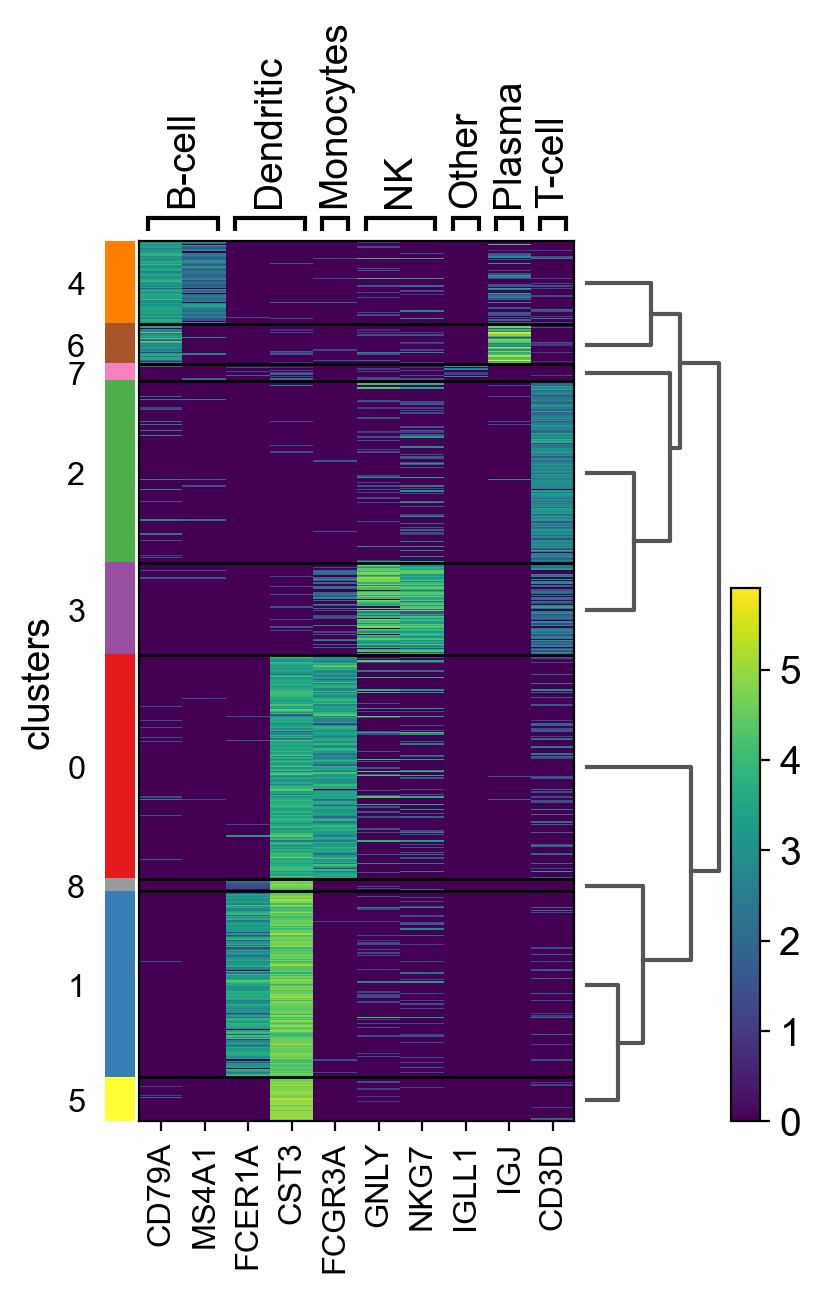

In [20]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

The heatmap can also be plotted on scaled data. In the next image, similar to the previus matrixplot the min and max had been adjusted and a divergent color map is used.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


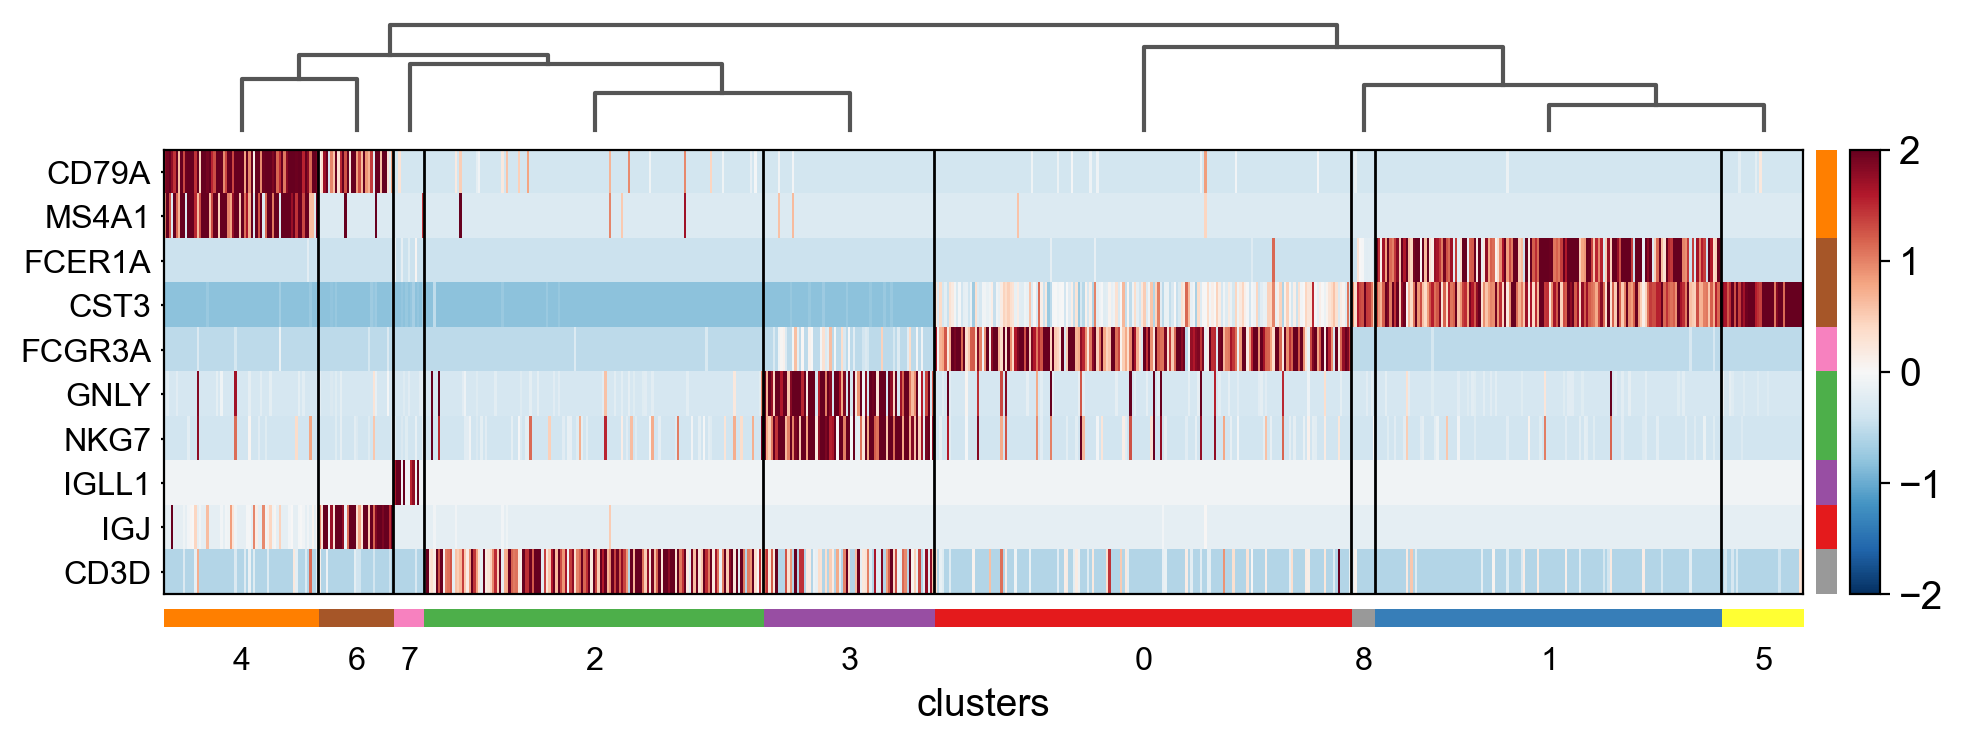

In [21]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

## Tracksplot

The track plot shows the same information as the heatmap, but, instead of a color scale, the gene expression is represented by height.

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


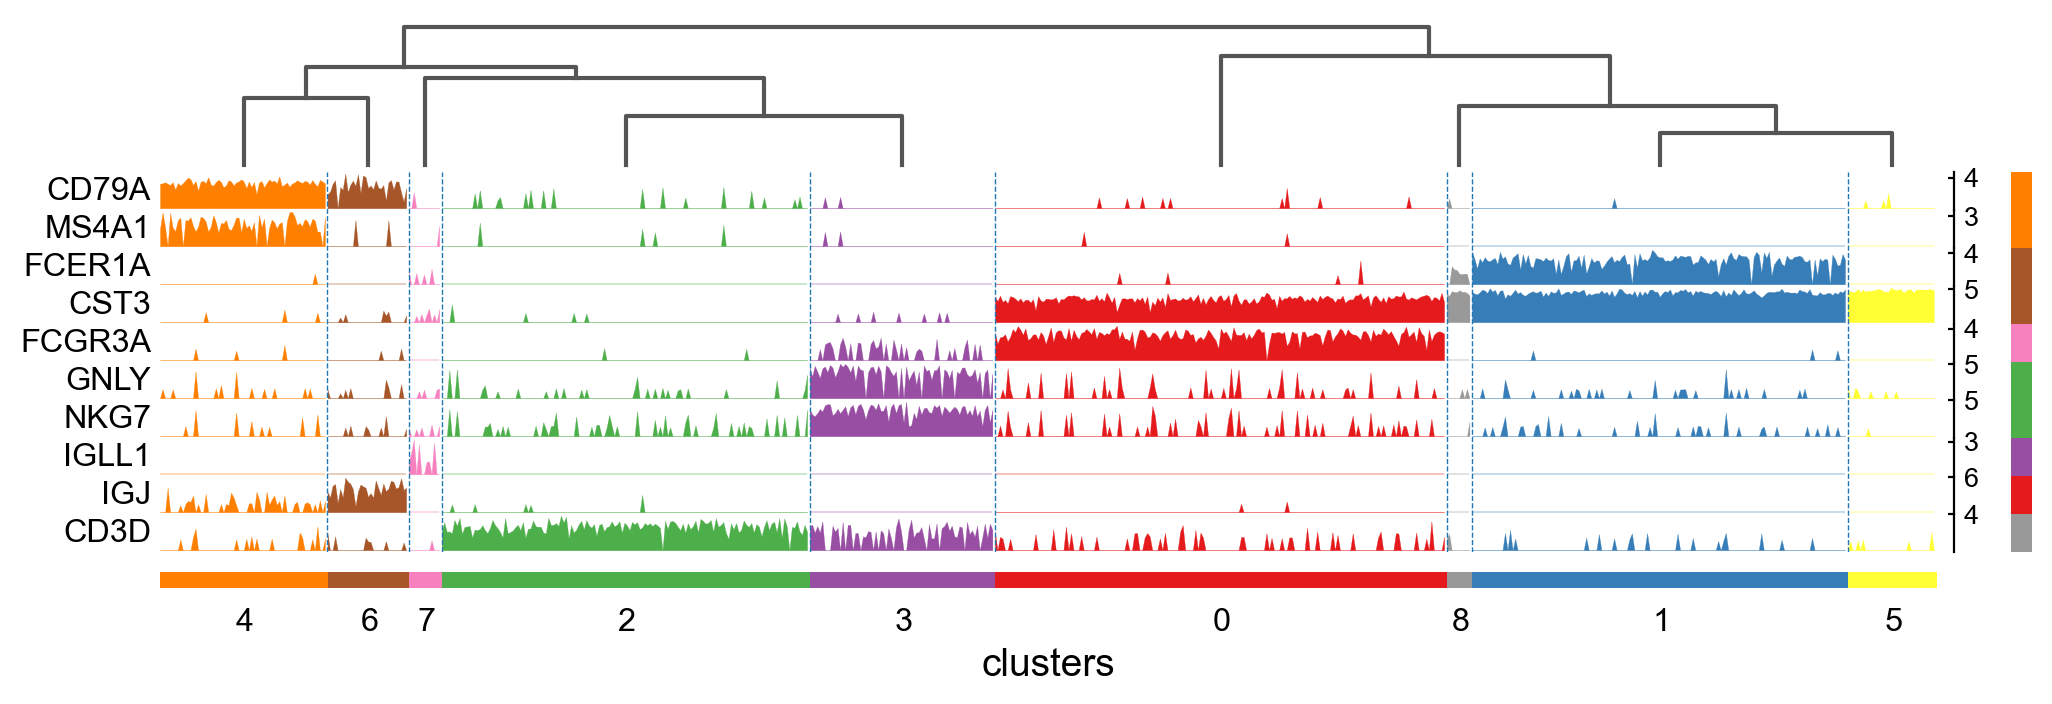

In [22]:
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)

# Visualization of marker genes

Instead of characterizing clusters by known gene markers as previously, we can identify genes that are differentially expressed in the clusters or groups.

To identify differentially expressed genes we run `sc.tl.rank_genes_groups`. This function will take each group of cells and compare the distribution of each gene in a group against the distribution in all other cells not in the group. Here, we will use the original cell labels given by 10x to identify marker genes for those cell types.

In [23]:
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')

## Visualize marker genes using dotplot

The dotplot visualization is useful to get an overview of the genes that show differential expression. To make the resulting image more compact we will use n_genes=4 to show only the top 4 scoring genes.

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


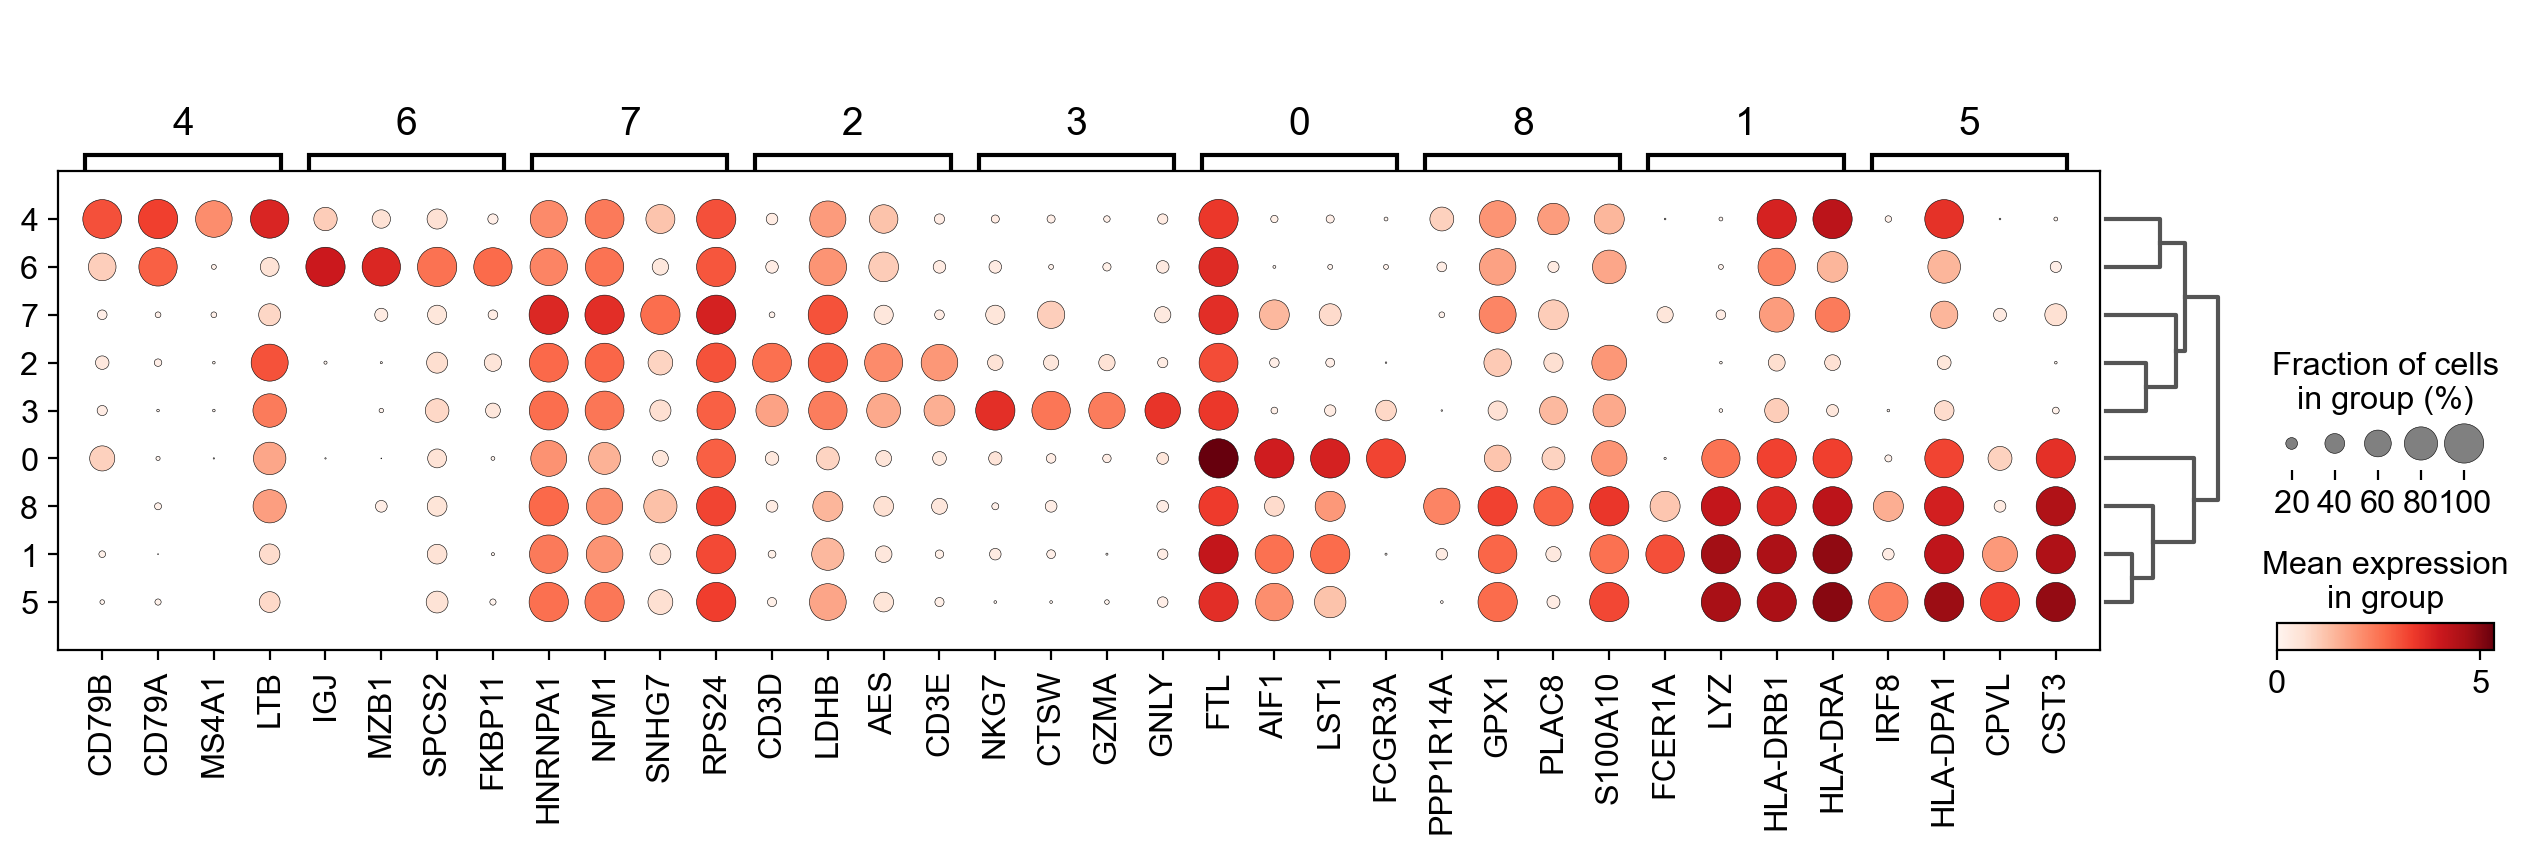

In [24]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

In order to get a better representation we can plot *log fold changes* instead of gene expression. Also, we want to focus on genes that have a log fold change >= 3 between the cell type expression and the rest of cells.

In this case we set `values_to_plot='logfoldchanges'` and `min_logfoldchange=3`.

Because log fold change is a divergent scale we also adjust the min and max to be plotted and use a divergent color map. Notice in the following plot that is rather difficult to distinguish between T-cell populations.

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


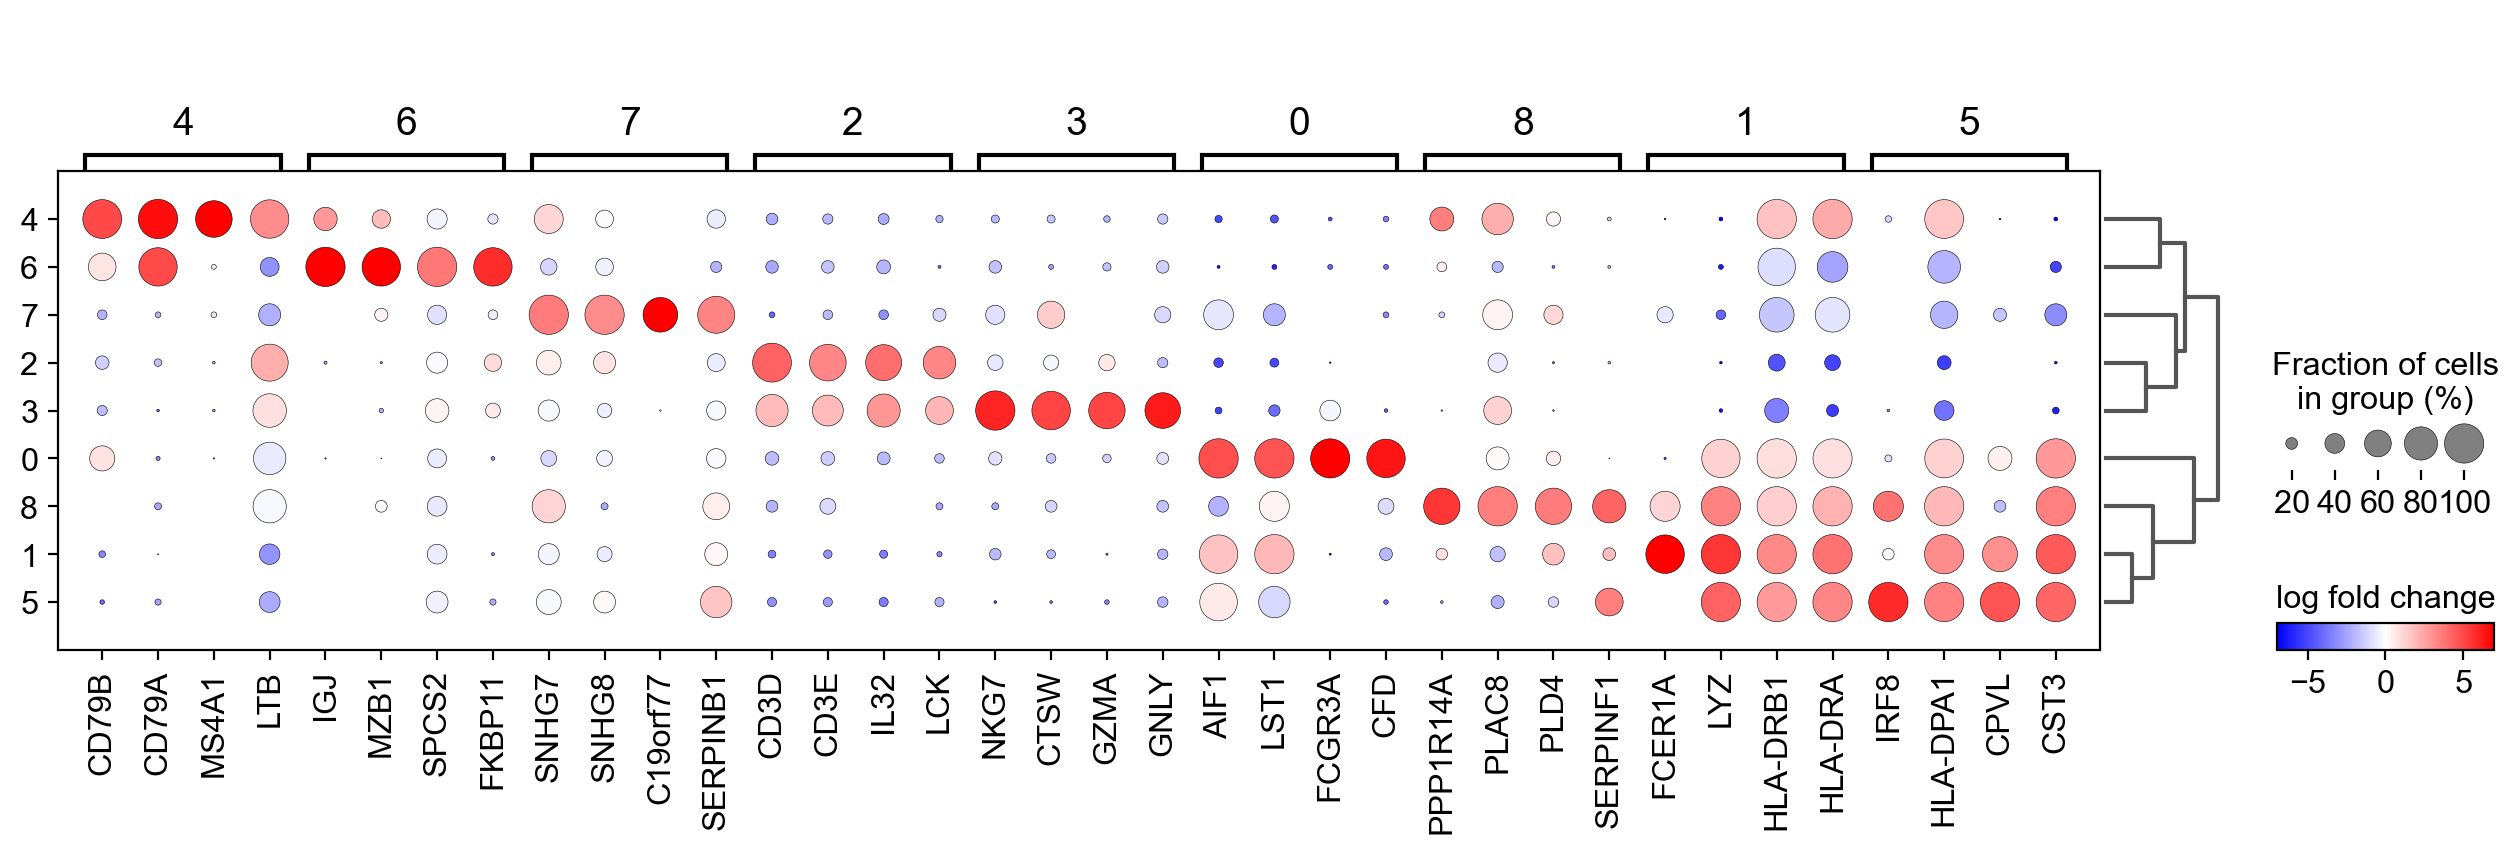

In [25]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4, values_to_plot='logfoldchanges', min_logfoldchange=3, vmax=7, vmin=-7, cmap='bwr')

## Focusing on particular groups

Next, we use a dotplot focusing only on two groups (the groups option is also available for violin, heatmap and matrix plots). Here, we set `n_genes=30` as in this case it will show all the genes that have a `min_logfoldchange=4` up to 30.

categories: 0, 1, 2, etc.
var_group_labels: 1, 5


/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


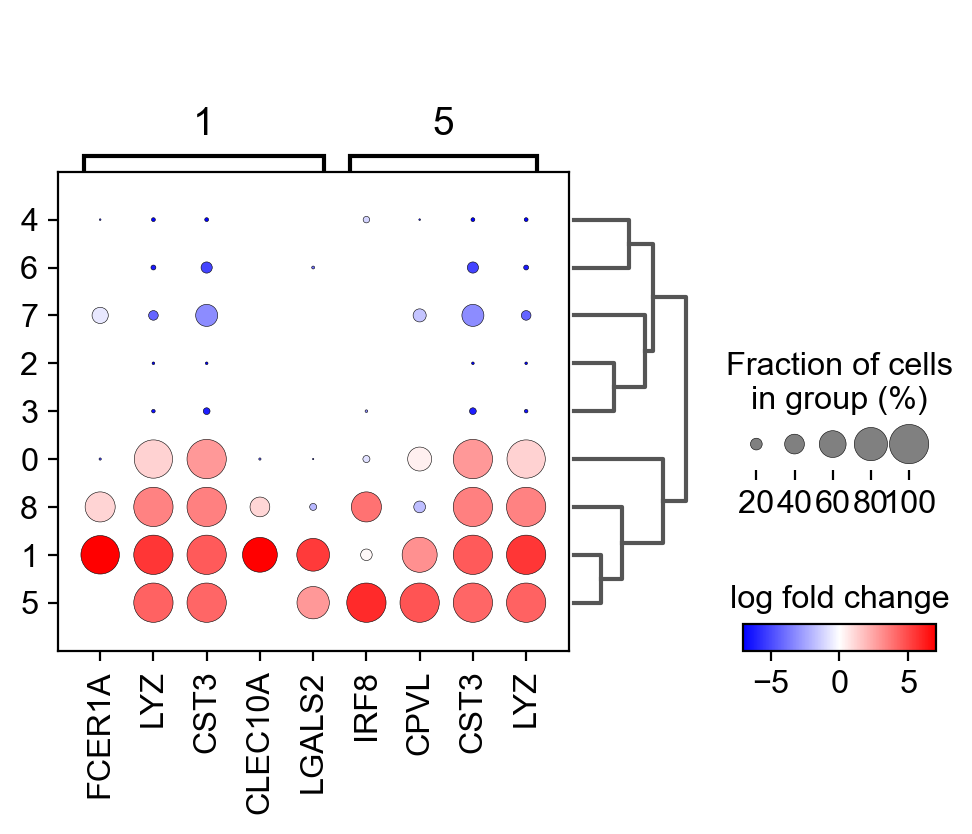

In [26]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=30, values_to_plot='logfoldchanges', min_logfoldchange=4, vmax=7, vmin=-7, cmap='bwr', groups=['1', '5'])

## Visualize marker genes using matrixplot

For the following plot the we use the previously computed ‘scaled’ values (stored in layer `scaled`) and use a divergent color map.

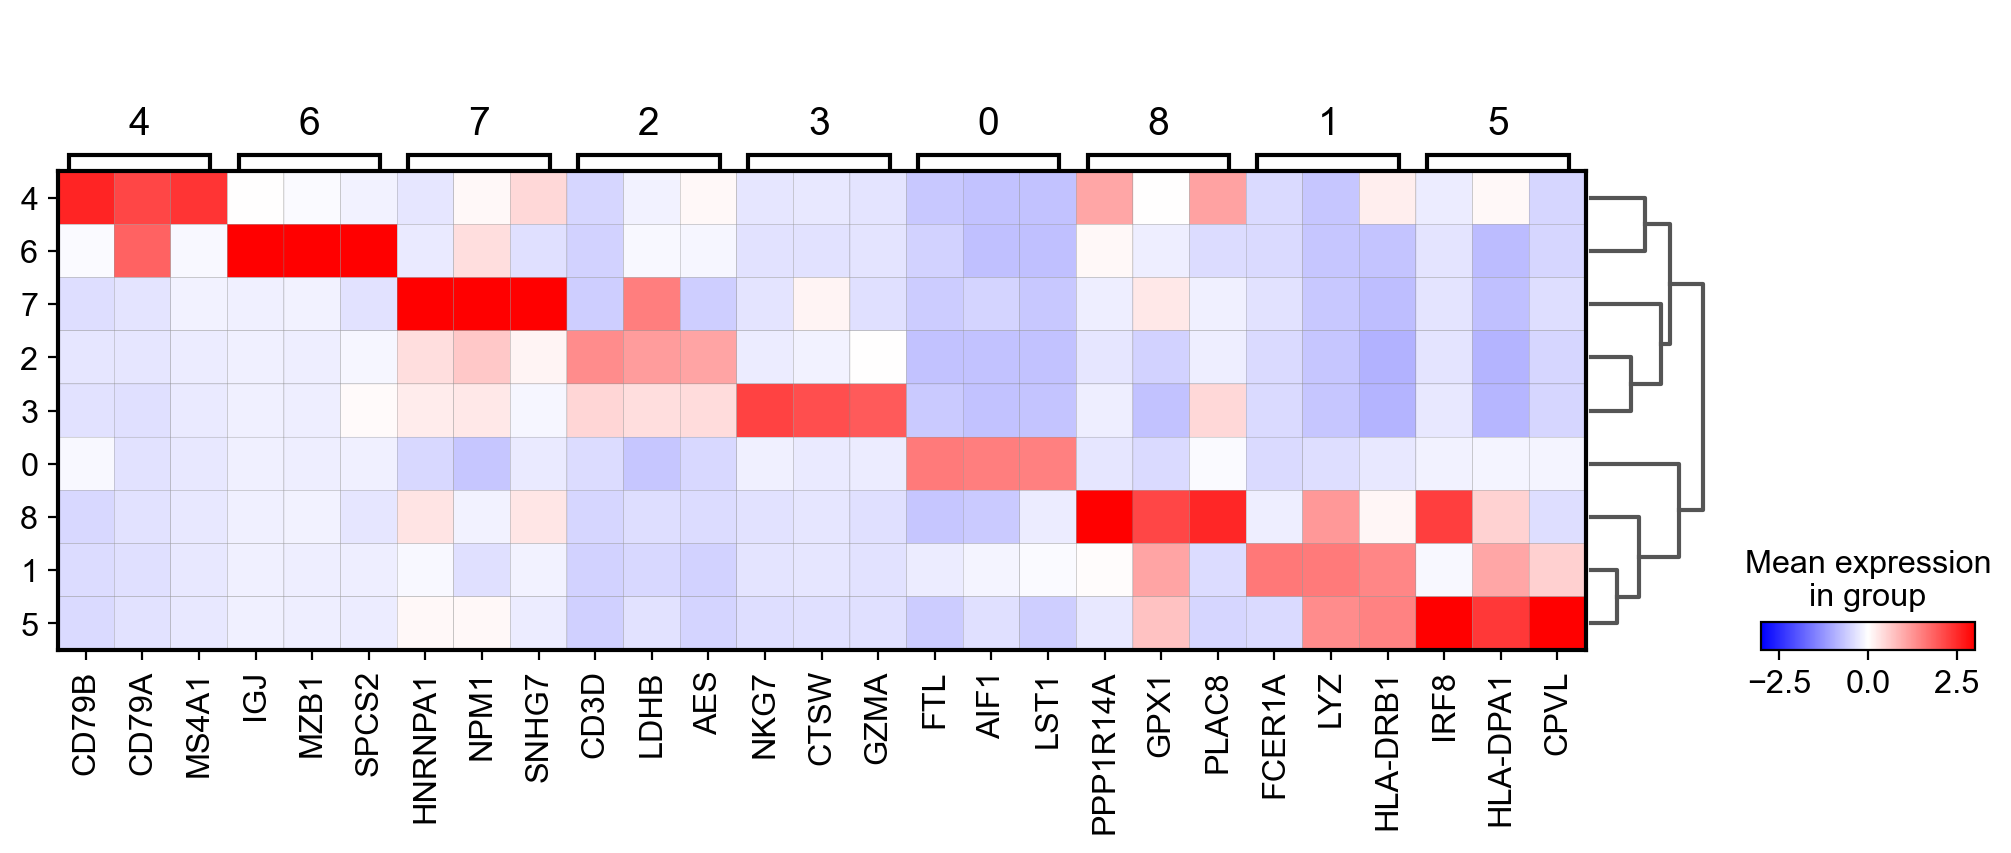

In [27]:
sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap='bwr', layer='scaled')

## Visualize marker genes using stacked violin plots

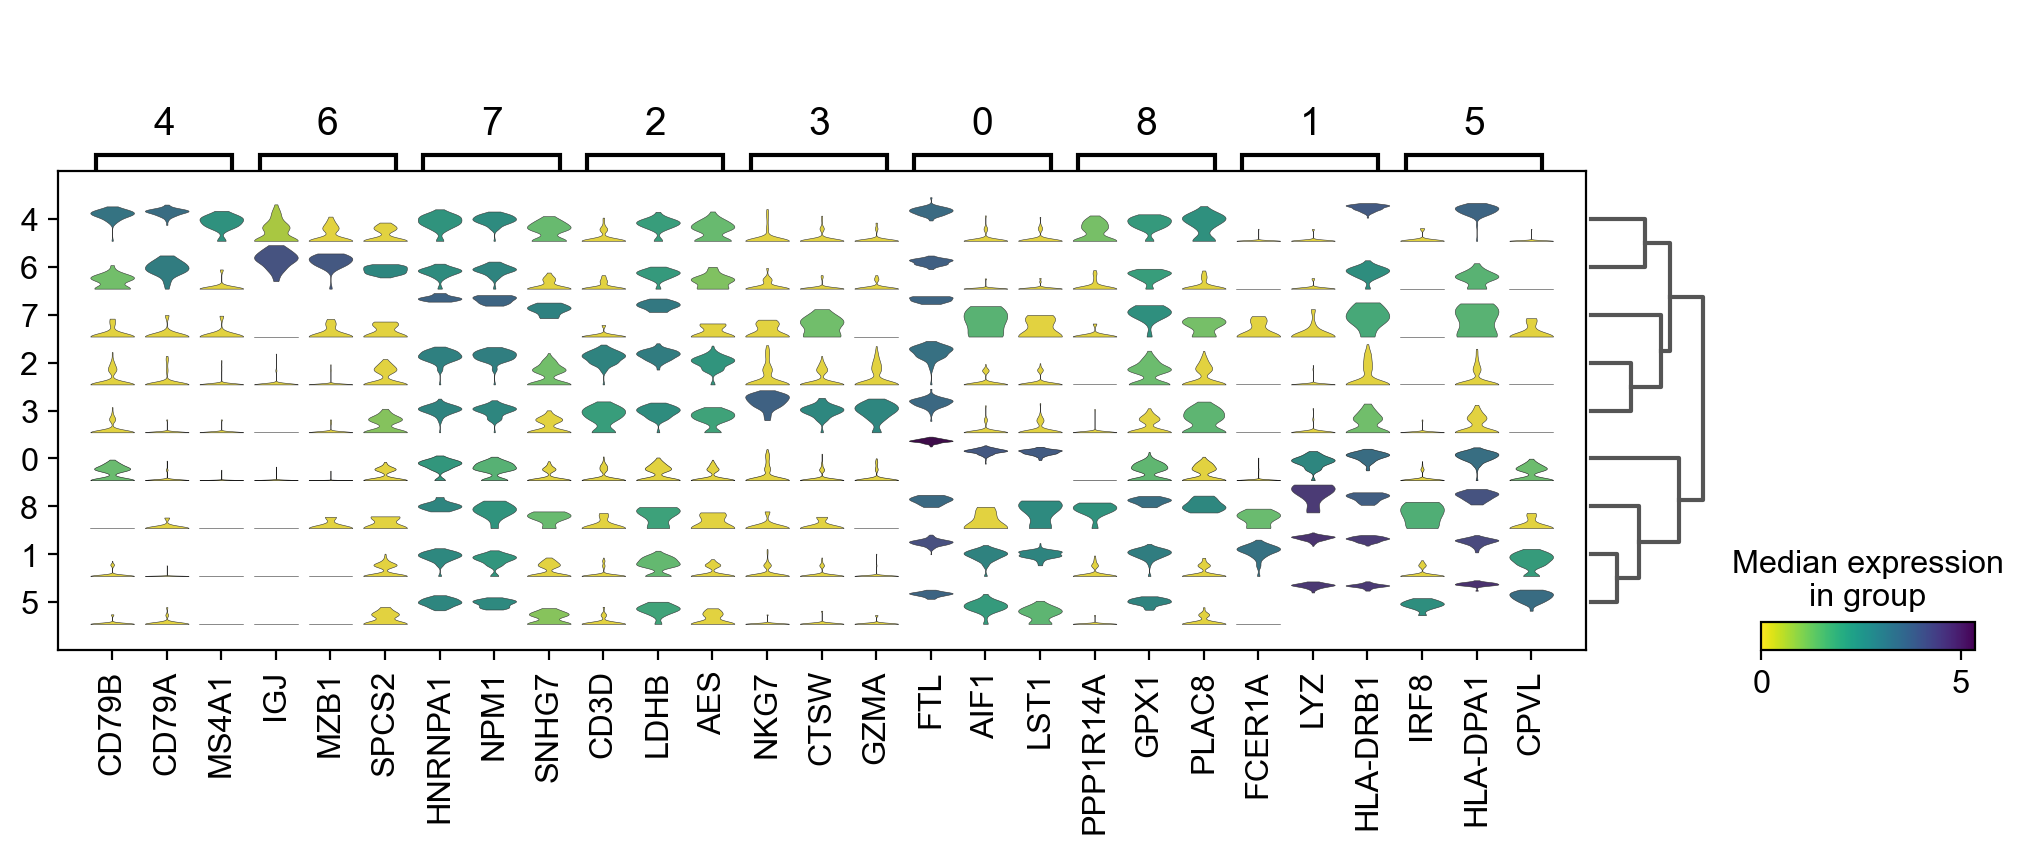

In [28]:
sc.pl.rank_genes_groups_stacked_violin(pbmc, n_genes=3, cmap='viridis_r')

## Visualize marker genes using heatmap

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


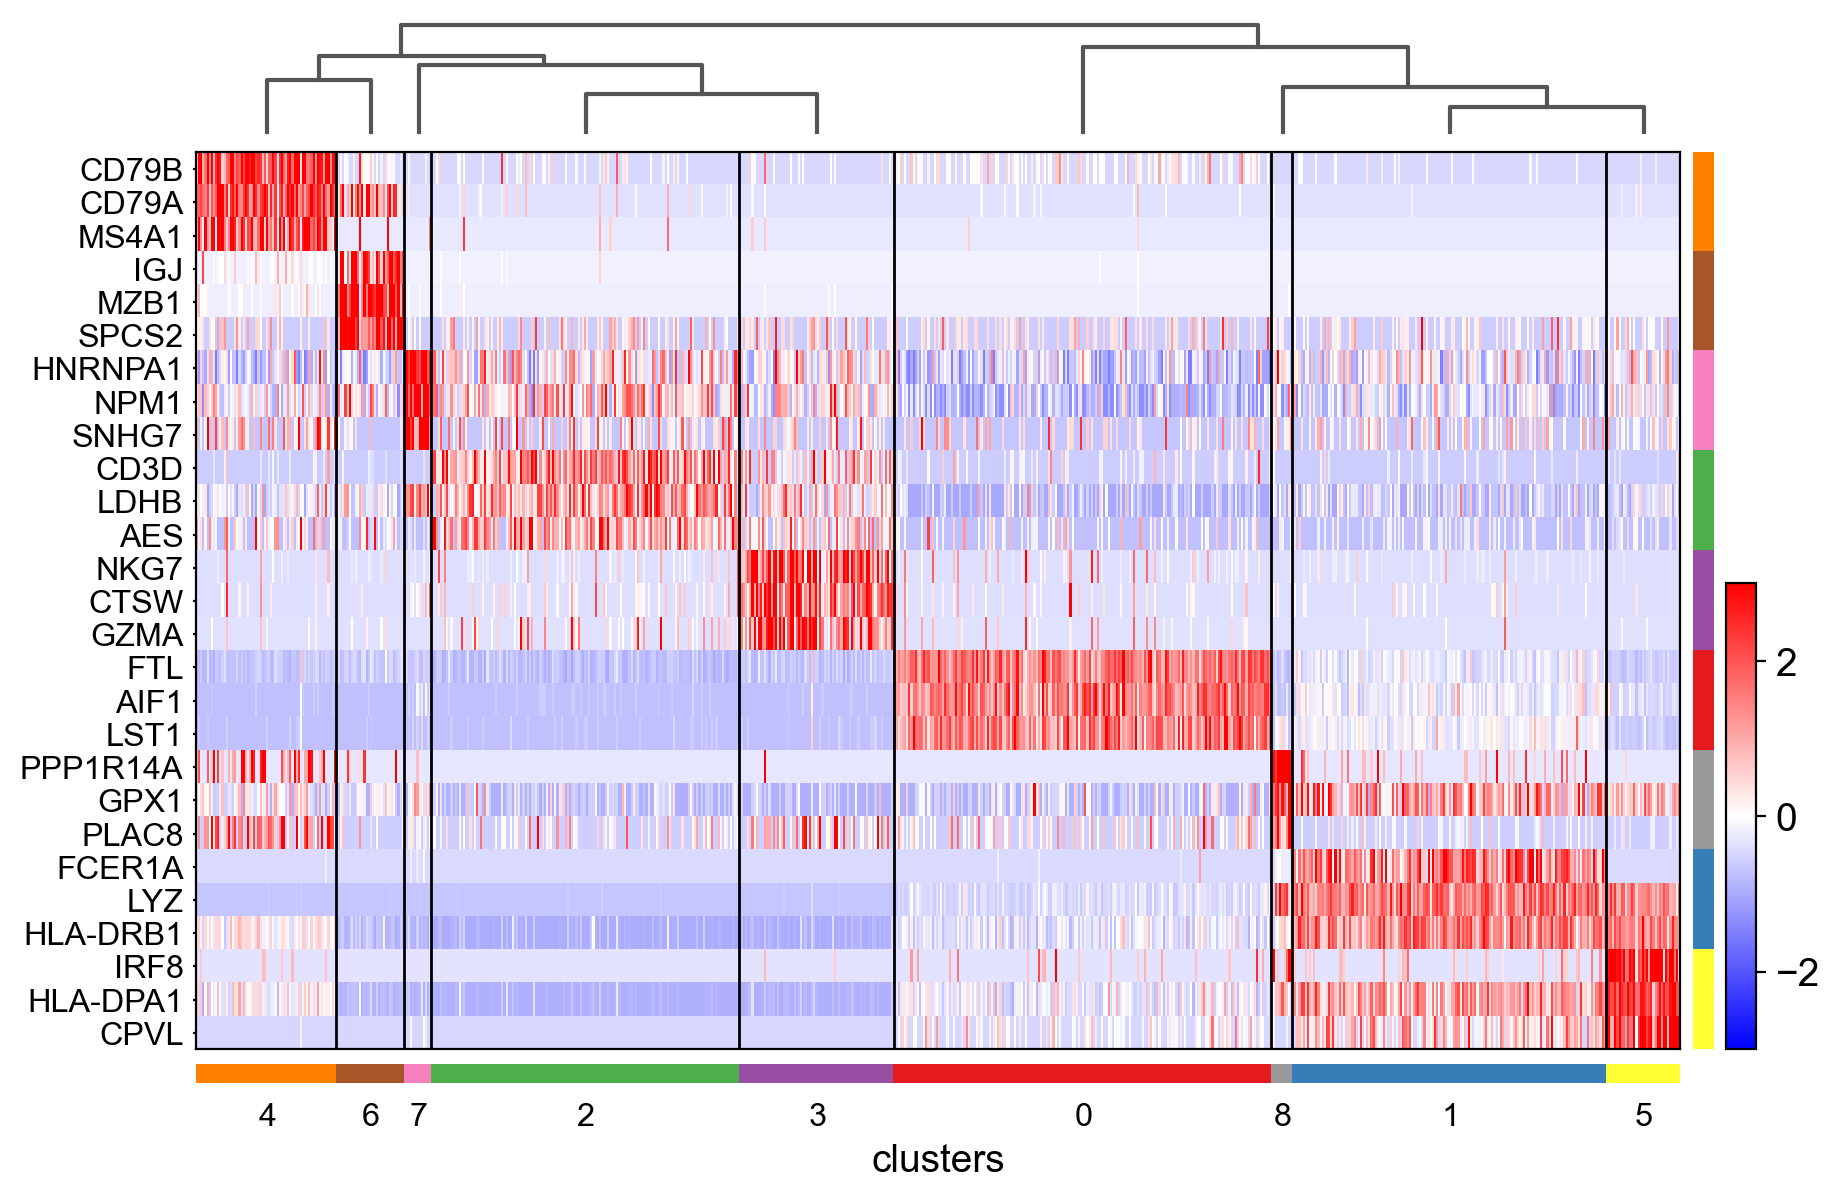

In [29]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);

Showing 10 genes per category, turning the gene labels off and swapping the axes. Notice that when the image is swapped, a color code for the categories appear instead of the ‘brackets’.

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


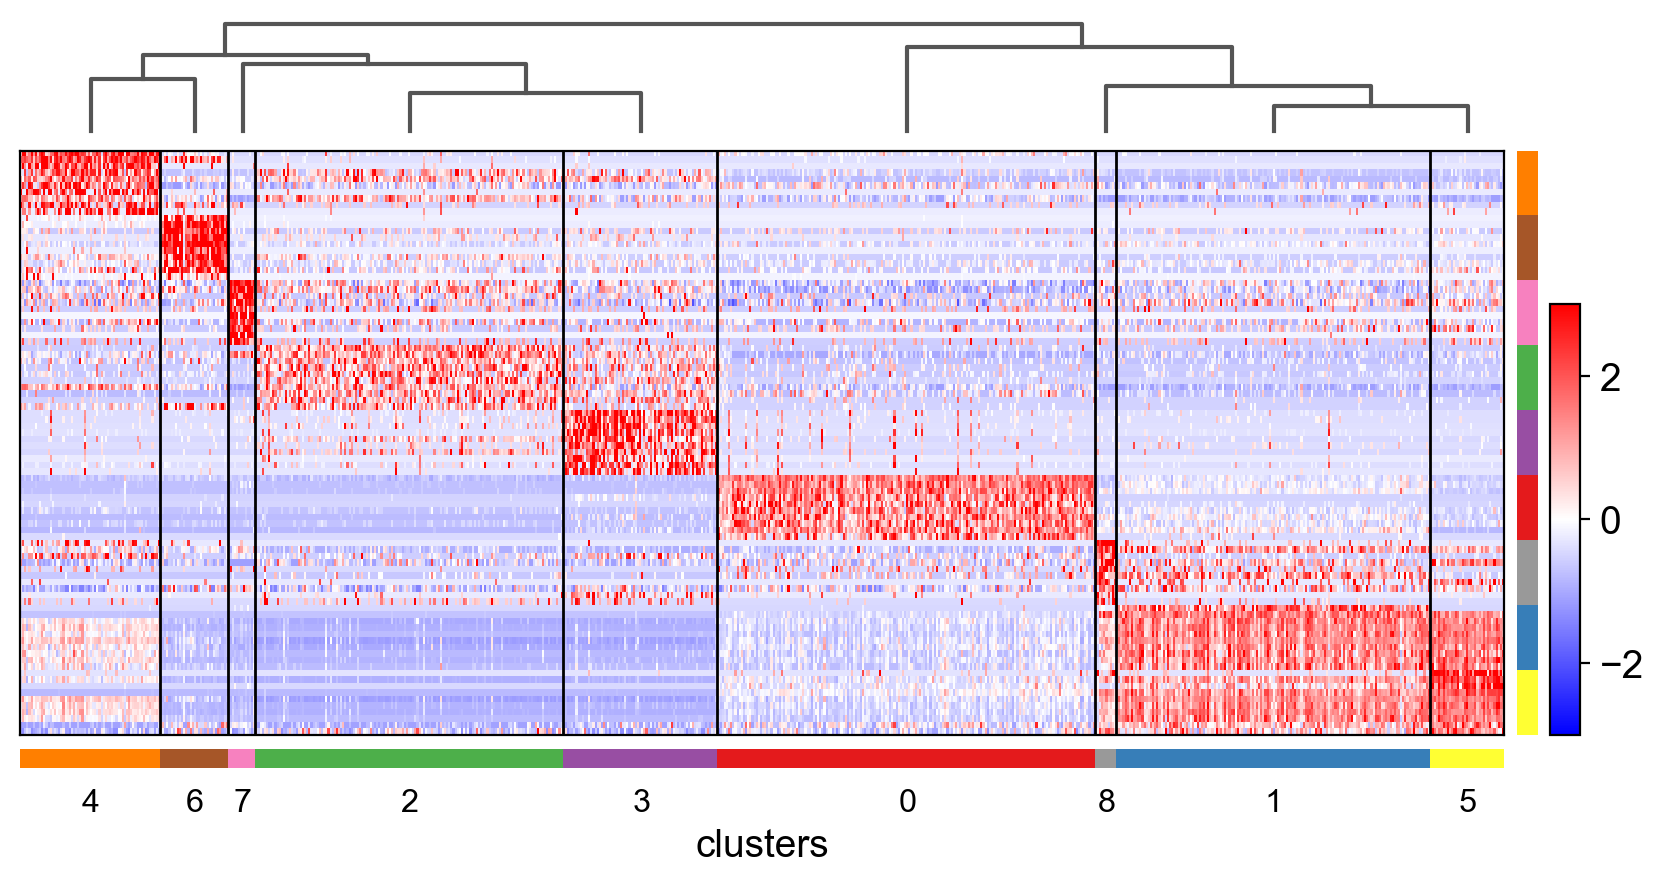

In [30]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
                                vmin=-3, vmax=3, cmap='bwr')

## Visualize marker genes using tracksplot

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


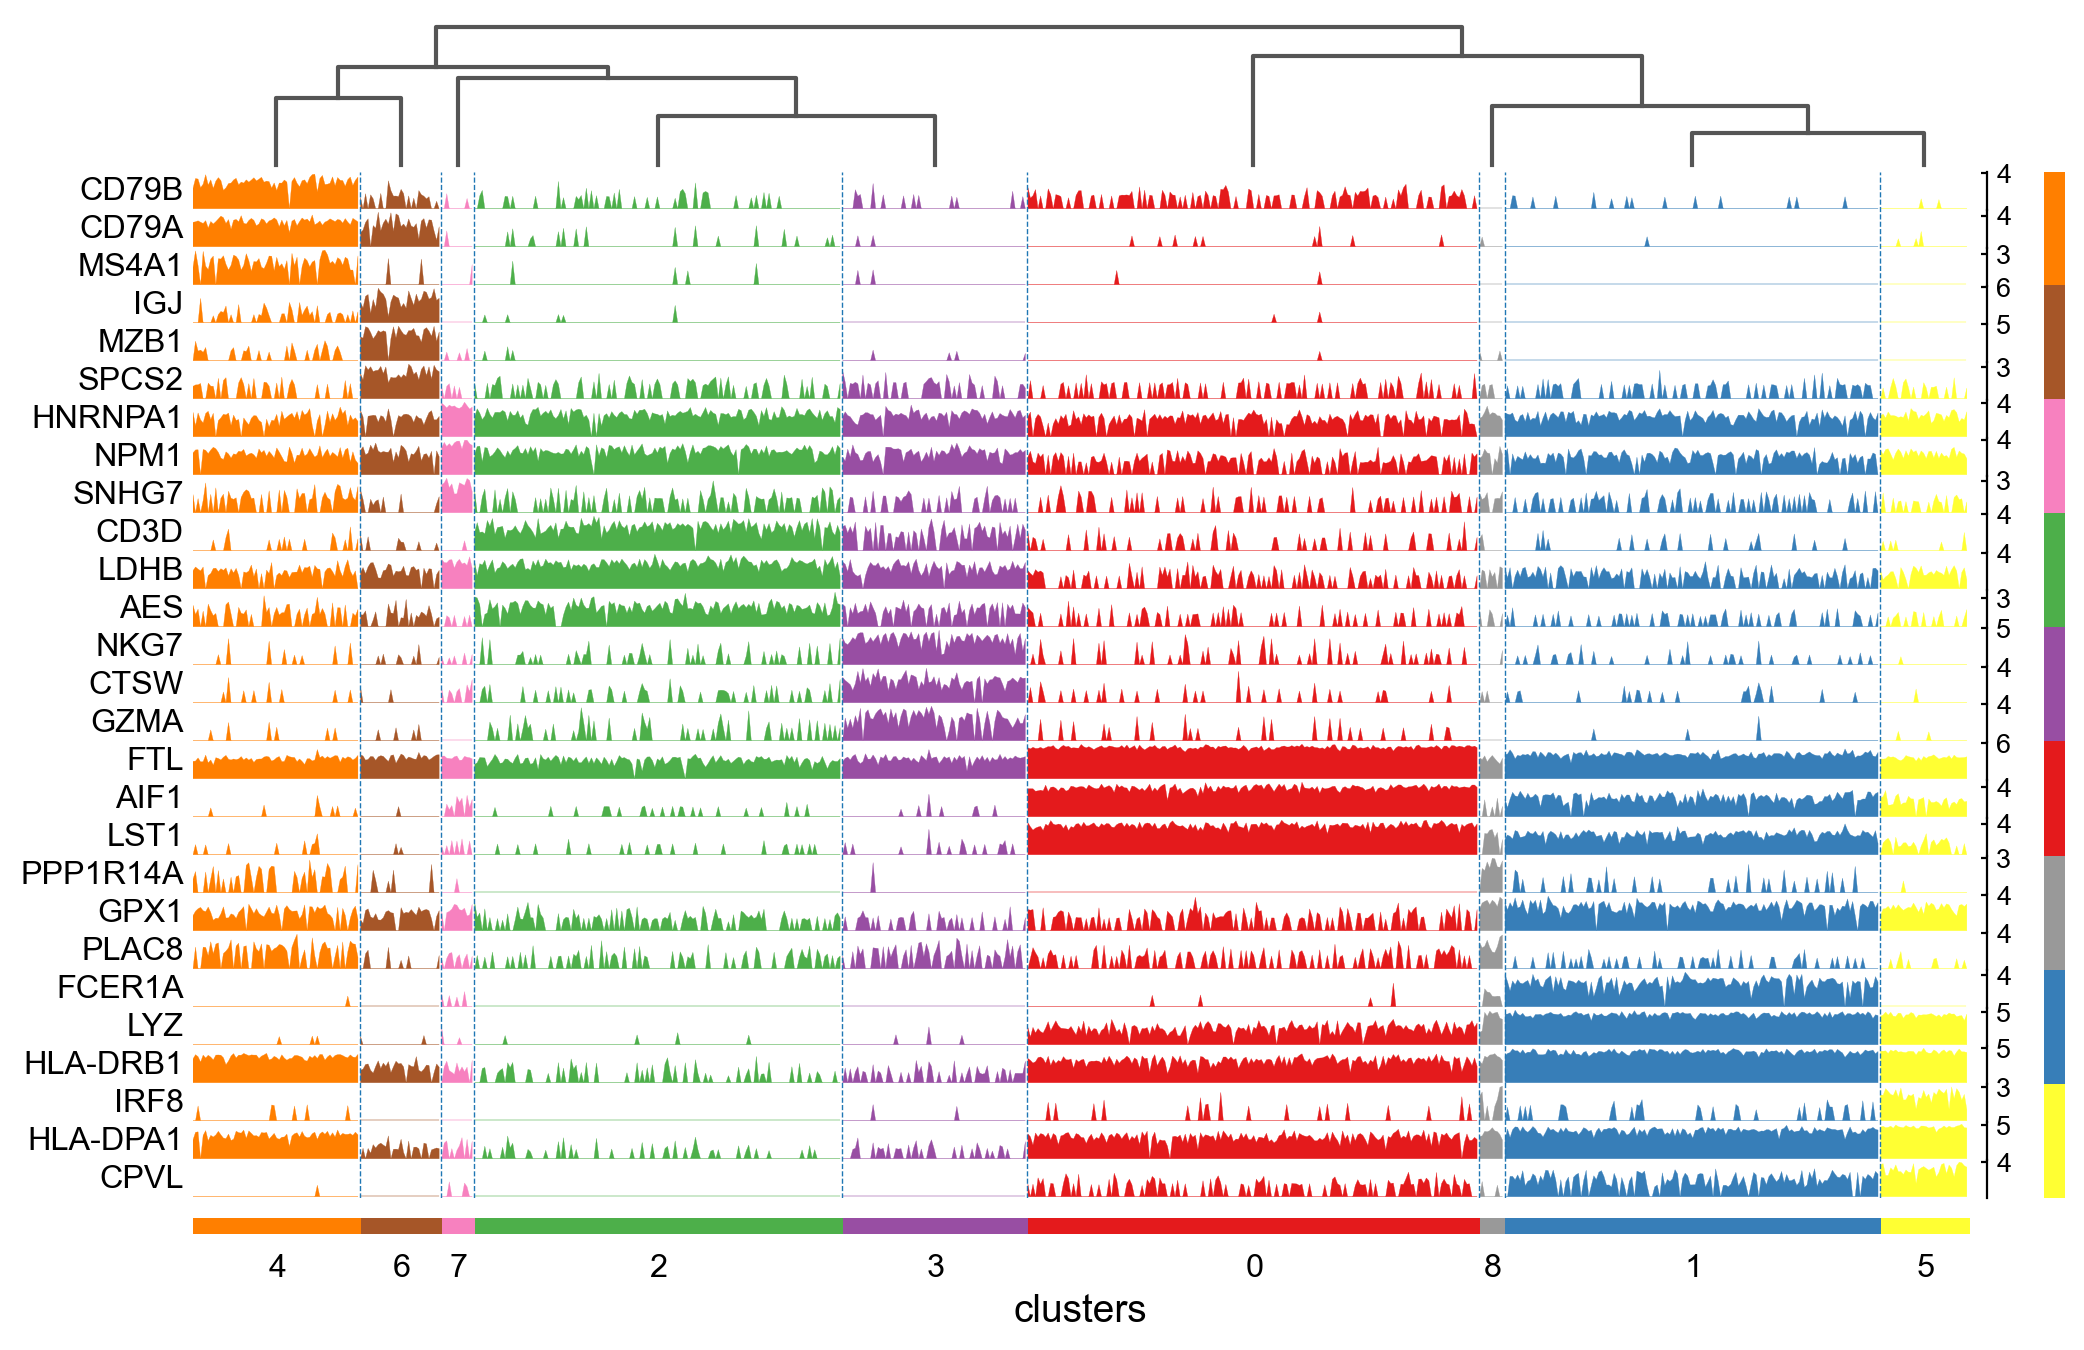

In [31]:
sc.pl.rank_genes_groups_tracksplot(pbmc, n_genes=3)

## Comparison of marker genes using split violin plots

In scanpy, it is very easy to compare marker genes using split violin plots for all groups at once.

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


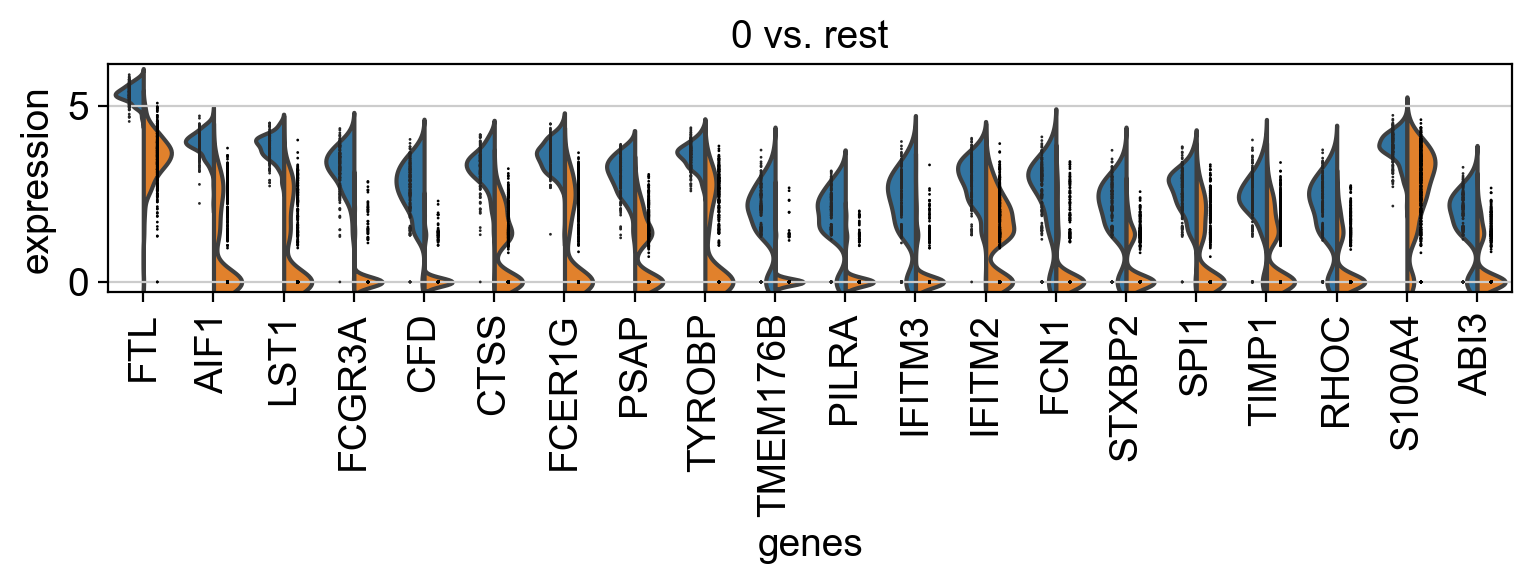

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


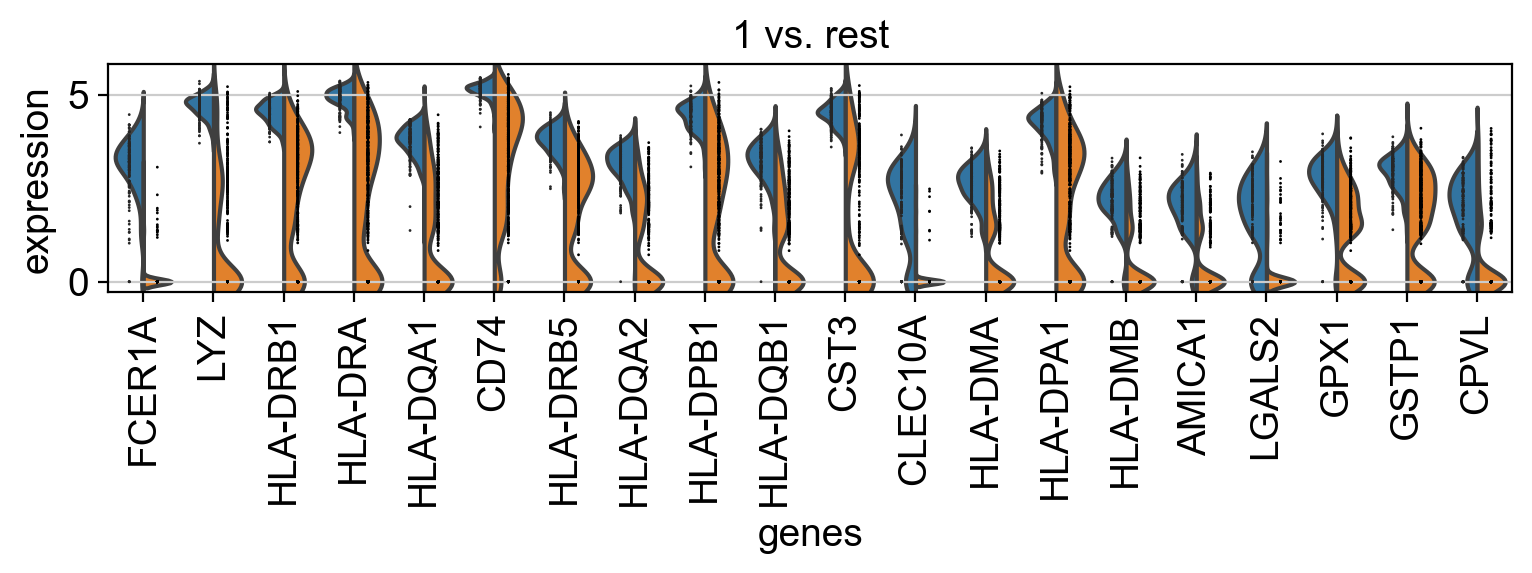

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


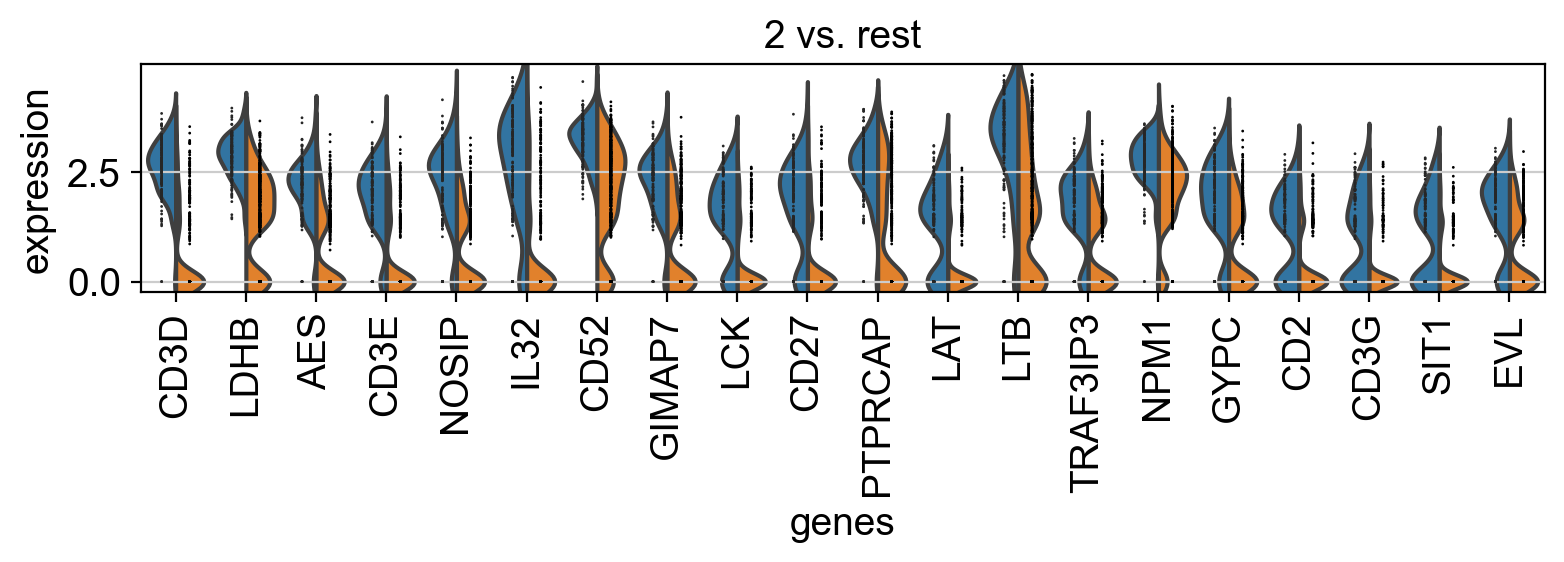

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


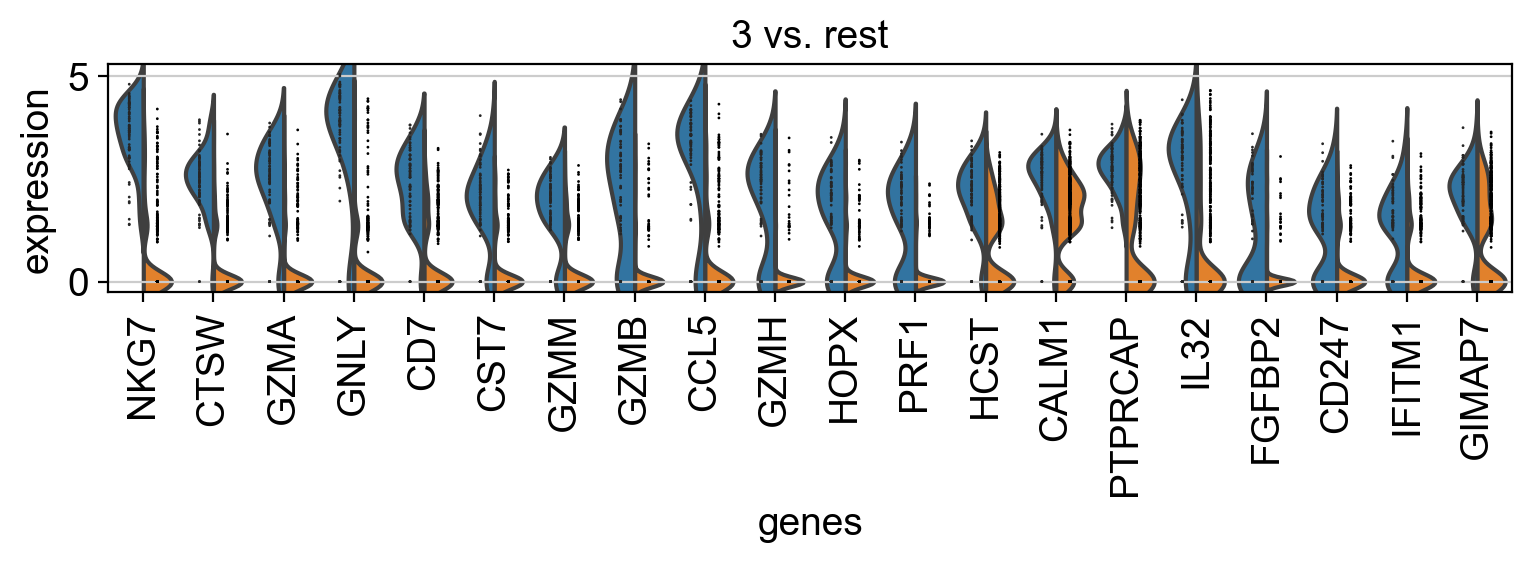

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


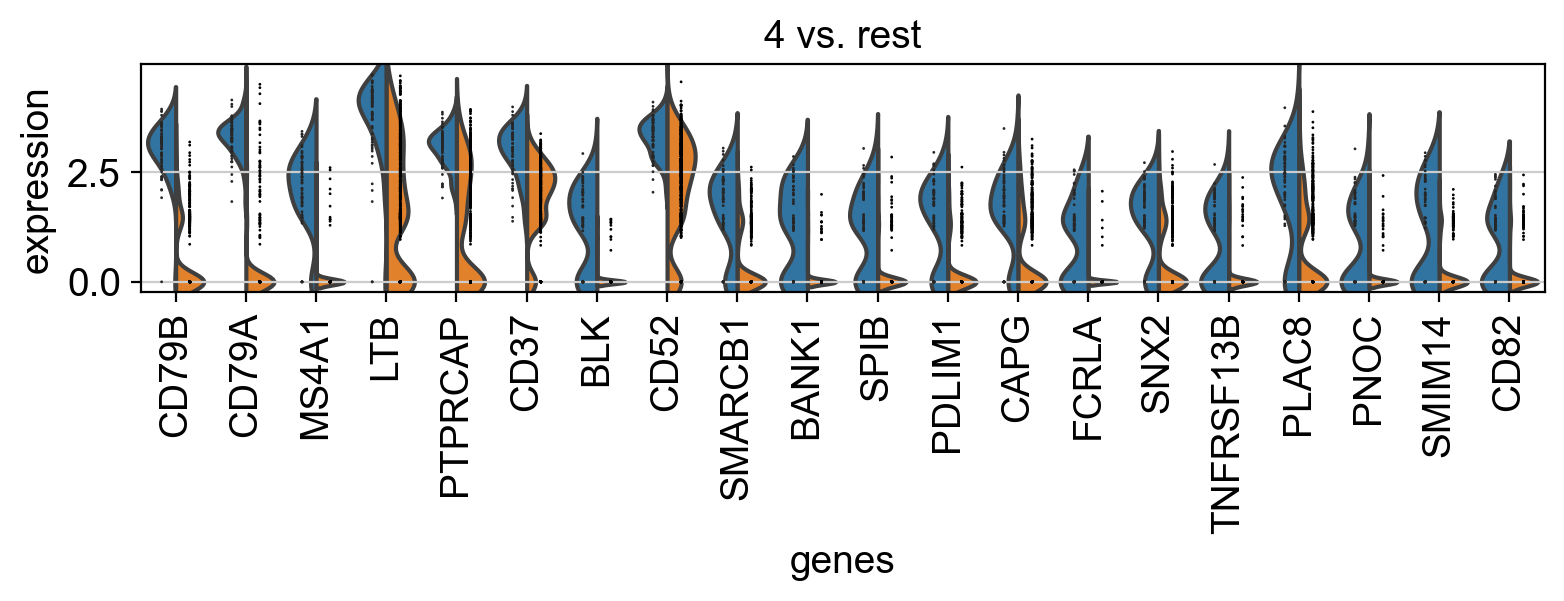

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


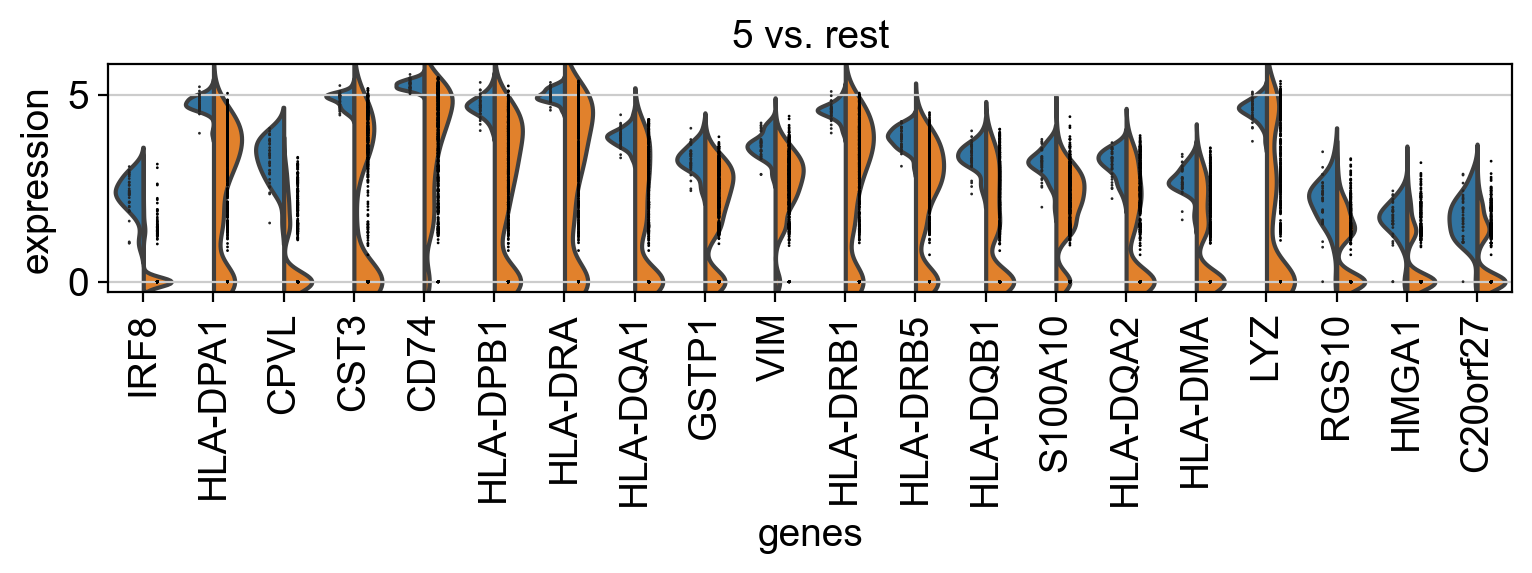

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


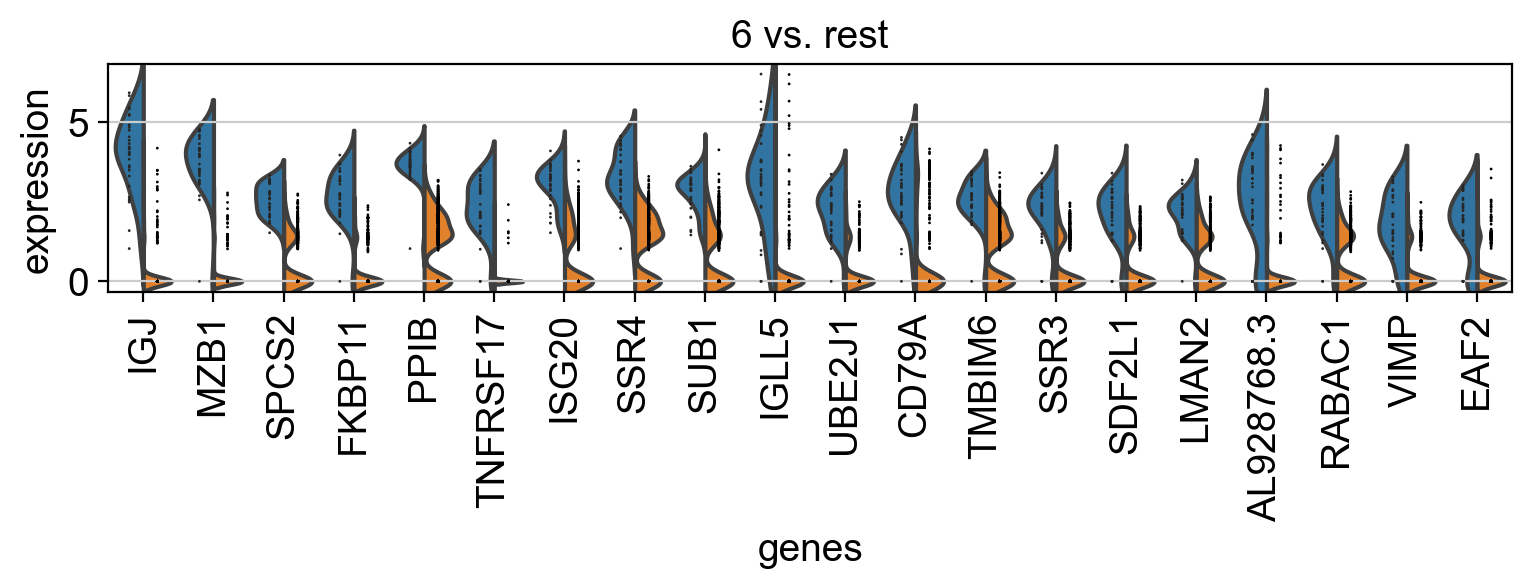

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


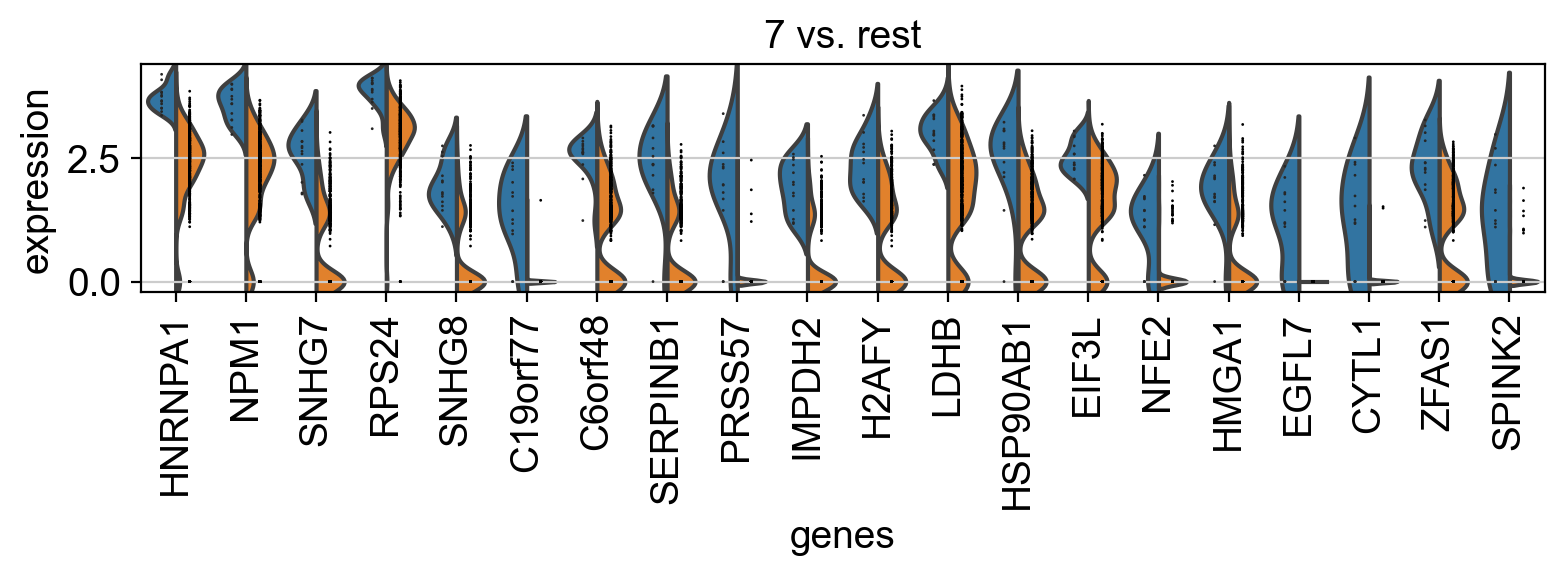

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


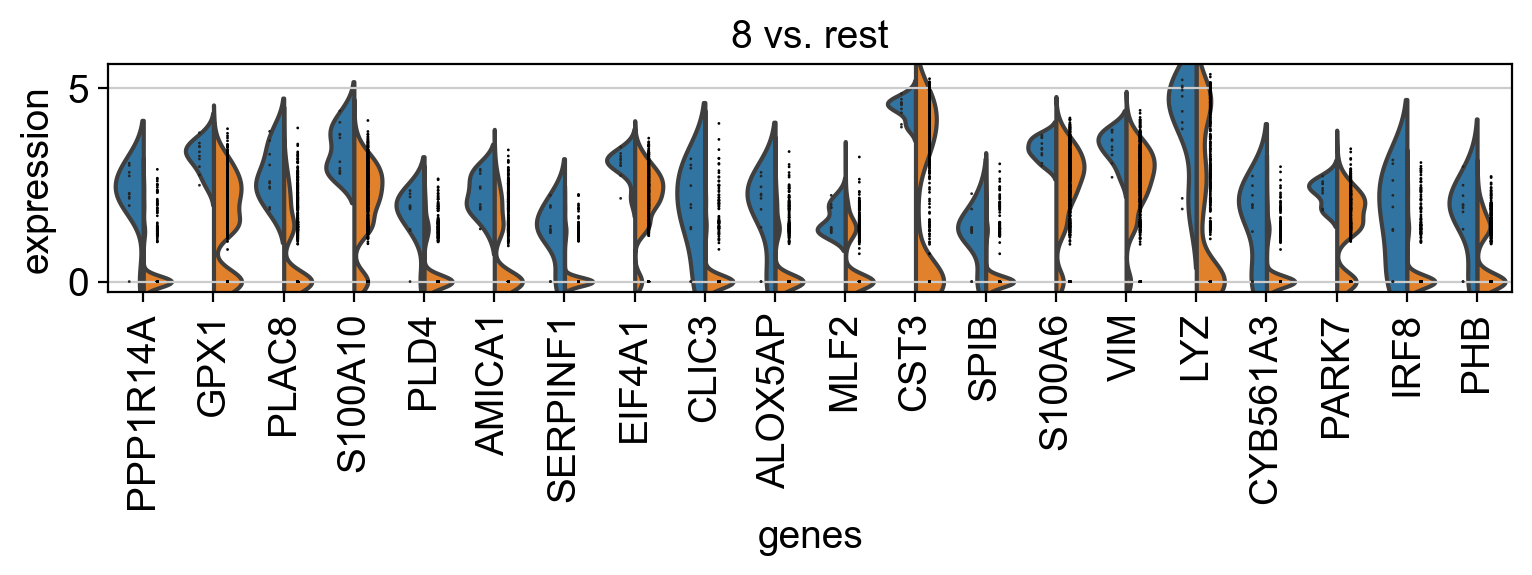

In [32]:
with rc_context({'figure.figsize': (9, 1.5)}):
    sc.pl.rank_genes_groups_violin(pbmc, n_genes=20, jitter=False)

## Dendrogram options

Most of the visualizations can arrange the categories using a dendrogram. However, the dendrogram can also be plotted independently as follows:

In [33]:
# compute hierarchical clustering using PCs (several distance metrics and linkage methods are available).
sc.tl.dendrogram(pbmc, 'bulk_labels')

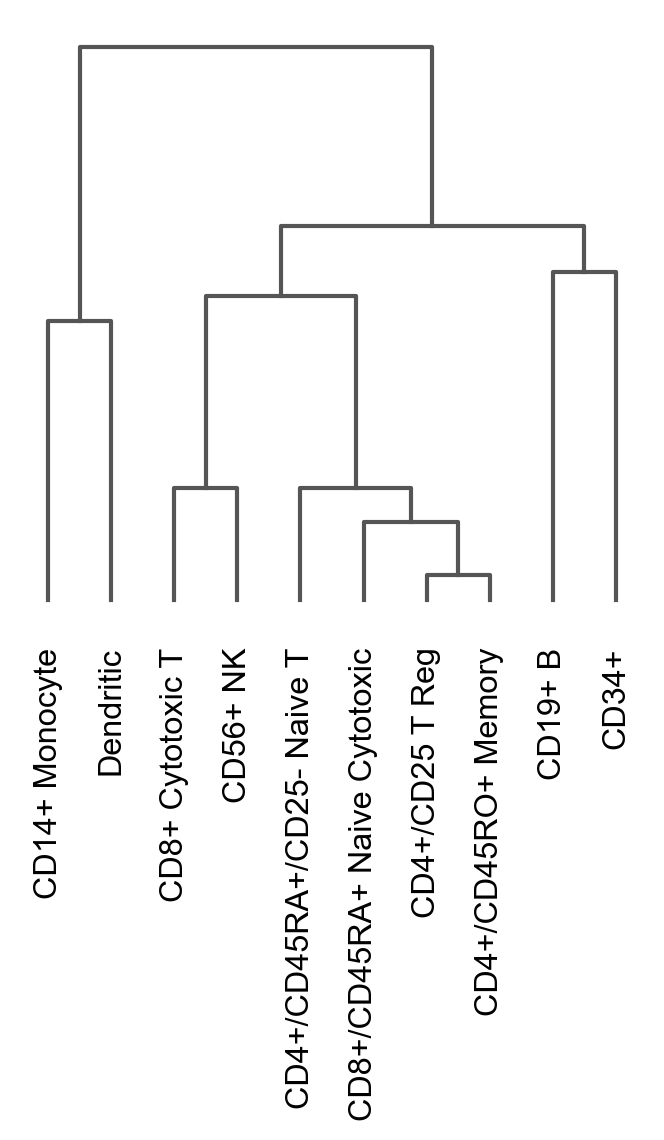

In [34]:
ax = sc.pl.dendrogram(pbmc, 'bulk_labels')

## Plot correlation

Together with the dendrogram it is possible to plot the correlation (by default ‘pearson’) of the categories.

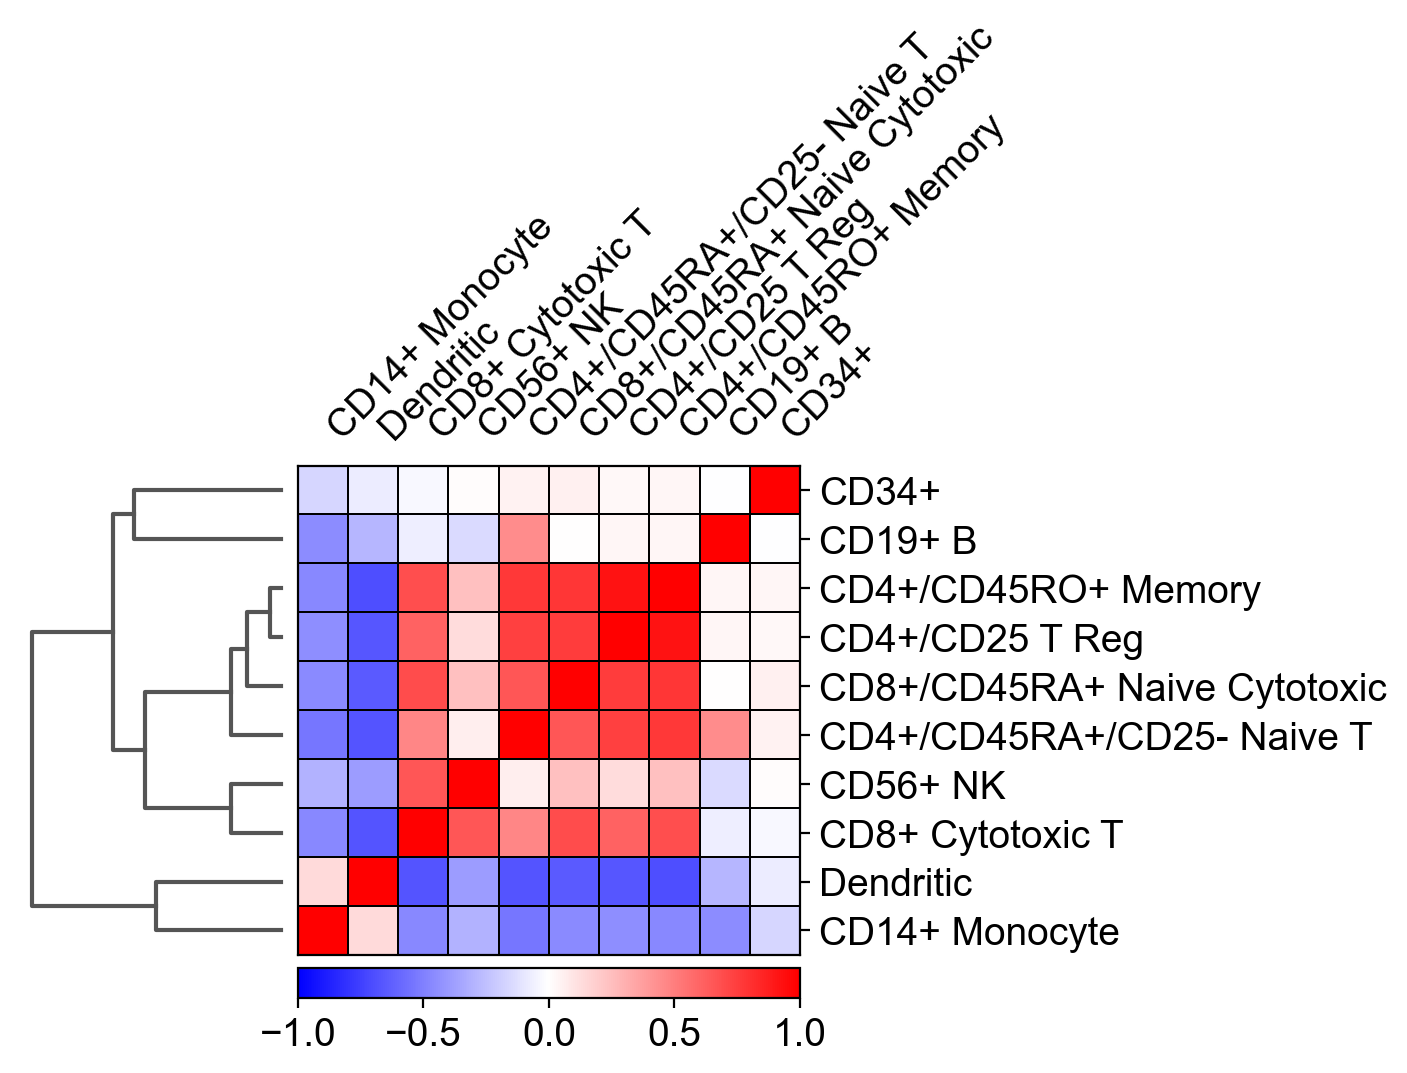

In [35]:
ax = sc.pl.correlation_matrix(pbmc, 'bulk_labels', figsize=(5,3.5))